<a href="https://colab.research.google.com/github/josue-cobaleda/sugarcane_prediction/blob/main/notebooks/Notebook_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelado Predictivo y Clasificación en la Industria de la Caña de Azúcar

### 1. Entendimiento del Negocio
- 1.1 Declaración del Problema
- 1.2 Objetivo SMART
- 1.3 Revisión de la Literatura

### 2. Entendimiento de los Datos
- 2.1 Visión General de los Datos Disponibles
- 2.2 Diccionario de Datos
- 2.3 Análisis Exploratorio de Datos (EDA)
  - 2.3.1 Análisis Univariado con visualización (TCH, %Sac.Caña)
  - 2.3.2 Análisis Multivariado: Variables Relevantes
  - 2.3.3 Valores Atípicos y Valores Faltantes
  - 2.3.4 Principales Hallazgos del EDA

### 3. Preparación de los Datos
- 3.1 Limpieza de Datos e Imputación (con justificación)
- 3.2 Ingeniería de Características
- 3.3 Estrategia de División de Datos (Entrenamiento/Test/Validación)

### 4. Modelado: Modelo de Regresión
- 4.1 Desarrollo del Modelo
  - 4.1.1 Regresión Lineal para TCH
  - 4.1.2 Regresión Lineal para %Sac.Caña
- 4.2 Significado de las Variables e Interpretación de los Coeficientes
- 4.3 Supuestos del Modelo y Diagnóstico de Problemas y Soluciones
- 4.4 Evaluación: Validación (holdout y validación cruzada) y Métricas (R², RMSE, MAE)
- 4.5 Resultados y Limitaciones del Modelo

### 5. Modelado: Modelo de Clasificación
- 5.1 Transformación del Objetivo para Clasificación - Categorización de TCH y %Sac.Caña
- 5.2 Justificación de la Categorización (Umbrales, Lógica de Negocio, etc.)
- 5.3 Regresión Logística
- 5.4 K-Vecinos Más Cercanos (KNN)
- 5.5 Regularización y Selección de Características
- 5.6 Evaluación: Validación (Validación cruzada) y Métricas (Matriz de confusión, precisión, exactitud, recall, F1-score, kappa)
- 5.7 Resultados y Comparación de Clasificadores

# 1. Entendimiento del Negocio

## 1.1 Declaración del Problema

En los ingenios azucareros, dos indicadores clave determinan el éxito de la cosecha de la caña de azucar: el rendimiento agrícola medido en toneladas de caña por hectárea (TCH) y la calidad de la caña medida por el porcentaje de sacarosa (% sacarosa) que contiene. Predecir estos indicadores con anticipación es un gran desafío – pero de lograrlo, aporta un enorme valor. ¿Por qué? Imaginemos que un ingenio pueda estimar cuánta caña y cuánta azúcar obtendrá de sus cultivos antes de la cosecha: esto le permitiría planificar la molienda, optimizar la logística, gestionar inventarios de azúcar y tomar decisiones informadas sobre riego, fertilización o cosecha en el momento óptimo.

El Ingenio La Providencia, ubicado en el Valle del Cauca (Colombia), no es ajeno a este reto. Colombia se destaca por sus altos rendimientos cañeros – en promedio ~120 toneladas/ha, aproximadamente el doble del promedio mundial​ según el diario La República [Fuente: La República – Rendimiento de la caña en Colombia duplica promedio mundial](https://www.larepublica.co/economia/rendimiento-de-la-cana-de-azucar-en-colombia-duplica-el-promedio-mundial-3876015)
 – gracias a condiciones favorables y buenas prácticas agrícolas. Sin embargo, esos promedios esconden una alta variabilidad anual debida a factores climáticos: por ejemplo, en años recientes las lluvias excesivas redujeron el rendimiento de 127 t/ha a ~102 t/ha (una caída del 14%)​.

Este vaivén impacta la operación del ingenio: si la producción real resulta menor a la esperada, podrían infrautilizarse la fábrica y los camiones; si es mayor, podría haber problemas de capacidad o almacenamiento. Del mismo modo, la calidad de la caña (sacarosa) influye directamente en cuánta azúcar se produce por tonelada de caña. Una diferencia de unos pocos puntos porcentuales de sacarosa tiene un efecto enorme: en Colombia típicamente se extrae alrededor de un 9–11% de azúcar respecto al peso de la caña​ según Cenicaña [Fuente: Libro El cultivo de la caña – CENICAÑA](https://www.cenicana.org/pdf_privado/documentos_no_seriados/libro_el_cultivo_cana/libro_p297-313.pdf), por lo que cada punto de sacarosa ganado representa miles de toneladas adicionales de azúcar para la empresa.

Con estos números, queda claro que anticipar el rendimiento y la calidad no es solo un ejercicio académico, sino una necesidad práctica para ingenios como La Providencia. De hecho, la industria azucarera ha empezado a apoyarse en la analítica de datos para afrontar este desafío. Por ejemplo, el Ingenio Providencia reportó haber mejorado su rendimiento en un 10% mediante el uso de modelos predictivos basados en datos (monitoreando variables como consumo energético y concentración de sacarosa)​ según este artículo [Fuente: LinkedIn – Cómo la analítica revoluciona la industria azucarera](https://www.linkedin.com/pulse/de-los-datos-al-az%C3%BAcar-c%C3%B3mo-la-anal%C3%ADtica-revoluciona-jose-rodriguez-p2dqe/). Este caso demuestra que aprovechar los datos históricos del cultivo y herramientas de machine learning puede traducirse en ganancias reales de productividad. De igual forma, el centro de investigación Cenicaña ha desarrollado modelos que, combinando información climática y agronómica, permiten predecir la sacarosa antes de la cosecha con una precisión útil para la toma de decisiones [Fuente: Cenicaña – Modelos para la predicción categórica (2022)](https://www.cenicana.org/wp-content/uploads/2023/09/ia2022.pdf)​. Otros ingenios y agricultores están experimentando con tecnologías como sensores IoT en campo, imágenes satelitales y drones para estimar el vigor de los cultivos y proyectar el rendimiento esperado​. En resumen, existe un consenso en el sector: una predicción certera de TCH y % de sacarosa es un “santo grial” que permitiría optimizar todo el proceso productivo, desde el corte en el campo hasta la cristalización del azúcar en la fábrica.

En este contexto, el problema específico que buscamos resolver en el taller es: ¿Cómo podemos aprovechar los datos históricos del Ingenio La Providencia para predecir con anticipación el rendimiento (TCH) y la calidad (% sacarosa) de la caña de azúcar en sus campos? Dicho de otro modo, queremos construir modelos de analytics que conviertan registros pasados de campo (variedad de caña, edad de cultivo, clima, etc.) en pronósticos confiables de cuánta caña y qué grado de dulzura tendrá la próxima cosecha. Resolver este problema es crucial para La Providencia, ya que le permitiría mantenerse eficiente y competitivo. podrás decidir mejor cuándo y dónde cosechar, cómo asignar camiones y capacidad de molino, e incluso ajustar fertilizantes o riegos para mejorar esos números. Vale la pena recordar que este ingenio produce alrededor del 15% del azúcar de Colombia (unas 370 mil toneladas anuales) [Fuente: Tecnicana – Ingenio Providencia produce el 15% del azúcar en Colombia (2024)](https://tecnicana.org/2024/05/03/ingenios/ingenio-providencia/ingenio-providencia-produce-el-15-del-azucar-en-colombia/?v=056158413026), de modo que cualquier mejora en predictibilidad y control de su proceso agrícola puede traducirse en beneficios económicos sustanciales.


## 1.2 Objetivo SMART

El objetivo del proyecto se puede resumir en la siguiente pregunta SMART:

¿Qué tan bien podemos predecir el rendimiento y la calidad de la caña del Ingenio La Providencia mediante modelos de datos, y cómo esa predicción puede mejorar la planificación de la cosecha de 2025?

Desglosando los criterios SMART:

- Specific (Específico): Nos enfocaremos en dos métricas concretas – TCH (toneladas de caña por hectárea) y % de sacarosa en la caña – para campos del Ingenio La Providencia. La meta específica es crear (1) un modelo de regresión que estime el TCH de un lote dado antes de cosecharlo, y (2) un modelo de clasificación que categorice el % de sacarosa de ese lote (por ejemplo, en “alto” vs “bajo” con respecto a un umbral definido).

- Measurable (Medible): Evaluaremos el desempeño de los modelos con métricas cuantitativas. Por ejemplo, para el modelo de TCH, utilizaremos el error cuadrático medio (RMSE). Para la clasificación de sacarosa, mediremos la precisión, sensibilidad y especificidad en la identificación de lotes con alta sacarosa. Un criterio de éxito podría ser lograr, en datos de validación, un RMSE inferior a, digamos, 5 ton/ha en TCH y una precisión mínima del 70% en la clasificación de la sacarosa - valores que se consideran aceptables según experiencias previas​ de Cenicaña [Fuente: Cenicaña – Informe Anual 2022 (PDF)](https://www.cenicana.org/wp-content/uploads/2023/09/ia2022.pdf)

- Achievable (Alcanzable): Contamos con un histórico de datos amplio (detallado en la siguiente sección) que incluye rendimientos reales, variables agronómicas y climáticas. Además, existen precedentes en la industria azucarera que muestran que modelos de datos bien entrenados sí pueden lograr predicciones útiles. Usaremos técnicas de datos, por lo que el objetivo es ambicioso pero factible.

- Relevant (Relevante): El objetivo se alinea perfectamente con las necesidades del negocio. Mejorar la predicción de TCH y sacarosa contribuirá a optimizar la planificación de cosecha, lo que a su vez reduce costos operativos y evita desperdicios (por ejemplo, cortando caña en su punto óptimo de madurez sacarosa, o asignando recursos donde se obtendrá mayor tonelaje).

- Time-Bound (Limitado en Tiempo): Planteamos lograr prototipos de modelos predictivos durante el desarrollo del taller (es decir, al 31 de marzo). Específicamente, esperamos tener un modelo entrenado y evaluado, de modo que La Providencia pueda probar estas predicciones en campo en un futuro cercano.

Para final del taller, la meta es responder con evidencia: “Nuestro modelo puede predecir TCH con X error y clasificar sacarosa con Y% acierto.”

## 1.3 Revisión de la Literatura

Para abordar el problema, es útil aprender de estudios previos sobre predicción de rendimiento agrícola, particularmente en caña de azúcar. A continuación, resumimos hallazgos relevantes de la literatura técnica y académica, enfatizando qué variables y métodos se han empleado y qué lecciones podemos extraer:

1) **Modelos de Predicción de Rendimiento con Imágenes de Drones** (Honduras, 2022) [Fuente: Zamorano Digital – Uso de imágenes multiespectrales para estimar rendimiento de caña previo a la cosecha](https://bdigital.zamorano.edu/items/81c9dc13-6bb2-4c9e-b3d4-877f61962a5b): Huarquila et al. (2022) desarrollaron modelos para predecir el rendimiento de caña a partir de índices multiespectrales obtenidos con drones y satélites​. Integraron estos índices (NDVI, índices de borde rojo, humedad del suelo, etc.) con variables fenológicas y meteorológicas. Sus resultados fueron muy prometedores: encontraron correlaciones muy altas entre las mediciones de campo y las estimaciones del modelo. Por ejemplo, para cierta variedad lograron un coeficiente de determinación R² ~0.97 en la predicción de rendimiento​, indicando que el modelo explicaba casi toda la variabilidad del rendimiento en esa variedad. Otras variedades tuvieron ajustes algo menores (R² entre 0.69 y 0.90)​, pero en general la metodología demostró que la teledetección puede ser una herramienta poderosa.

    Lecciones:
-  Indicadores simples como la altura del cultivo pueden explicar gran parte de la variación en TCH, lo que sugiere que variables agronómicas tradicionales (edad de la caña, vigor) también podrían tener peso en nuestros modelos.
-  Es importante segmentar el análisis por variedad, ya que cada genotipo mostró comportamientos distintos – esto sugiere que en nuestro caso quizás debamos incluir la variedad como variable en los modelos o incluso entrenar modelos específicos por variedad si las diferencias son marcadas.

2) **Modelos Estadísticos con Variables Climáticas** (Honduras, 2008) [Fuente: Zamorano Digital – Estudio sobre predicción del rendimiento de caña con variables climáticas (PDF)](https://bdigital.zamorano.edu/server/api/core/bitstreams/da398d02-1b5d-4786-b364-e7b5a5784b9f/content): Antes del boom de sensores y ML, se exploraron modelos basados en regresiones tradicionales. Un estudio de Arias (2008) trató de predecir el rendimiento de caña en Honduras usando únicamente datos climáticos históricos (temperaturas, lluvia, humedad)​. Se probó una regresión linear múltiple y algunas transformaciones, logrando R² modestos: alrededor de 0.48–0.53 en el mejor de los casos​. Identificaron que la temperatura mínima y la precipitación acumulada eran las variables climáticas con mayor poder explicativo (efecto positivo de la temp. mínima y negativo de la lluvia sobre el rendimiento)​. Sin embargo, la conclusión fue que el clima por sí solo no basta para predicciones confiables – hace falta incluir factores de manejo y características del cultivo.

    Lecciones:
- Las condiciones meteorológicas impactan el rendimiento (ej. exceso de lluvia puede mermar la caña), pero un modelo puramente climático deja por fuera mucha variabilidad.
- En nuestros modelos, debemos combinar clima más variables agronómicas locales (variedad, edad, fertilización, etc.) para mejorar el poder predictivo.
- De los factores climáticos, probablemente la precipitación y temperatura sean los primeros candidatos a incluir, pues estudios previos y conocimiento agronómico indican su influencia directa en el crecimiento y acumulación de azúcar.

3) **Predicción Categórica de Sacarosa en Campo** (Cenicaña, 2022) [Fuente: Cenicaña – Informe Anual 2022 (PDF)](https://www.cenicana.org/wp-content/uploads/2023/09/ia2022.pdf): Un aporte muy relevante lo da Cenicaña, que desarrolló modelos de clasificación para predecir si la caña de una suerte tendrá alta o baja sacarosa al momento de cosecha​. Utilizaron un enfoque de Random Forest entrenando por separado para 17 escenarios (combinaciones de zona agroecológica y variedad de caña)​. Alimentaron estos modelos con variables climáticas (lluvia, temperatura) y de manejo agronómico, como tipo y dosis de madurante aplicado, edad de cosecha y área del lote​. Para definir “alta” vs “baja” sacarosa, balancearon las categorías y escogieron umbrales óptimos usando curvas ROC. Los resultados mostraron una precisión promedio del 68% (aunque variable según el caso: algunas combinaciones lograron hasta ~77% de acierto y otras cayeron cerca de 55%)​. Un ejemplo citado es el de la variedad CC85-92 en cierta zona, donde el modelo alcanzó 72% de precisión con un umbral de corte de ~12.6% de sacarosa para definir la clase​.

    Lecciones:
- La predicción de sacarosa se puede abordar como un problema de clasificación binaria, lo cual simplifica la meta (acertar categorías en lugar de predecir el valor exacto).
- La necesidad de segmentar por variedad/zona: Cenicaña encontró que separar por grupos homogéneos mejoraba la precisión; esto sugiere que en La Providencia podríamos hacer algo similar (por ejemplo, un modelo específico para la variedad CC 01-1940 en zona húmeda, etc., si disponemos de suficientes datos por grupo).
- Variables críticas para la sacarosa fueron: clima (ej. menos lluvia suele correlacionar con más sacarosa hacia el final), uso de madurantes (químicos que inducen maduración, elevando la sacarosa) y la edad de corte. Esto nos indica que en nuestros datos debemos prestar atención especial a campos donde se aplicó madurante y al tiempo de maduración, ya que son determinantes de la calidad final.

En conjunto, la literatura sugiere que no hay un solo modelo para predecir rendimiento y calidad, pero sí varias piezas que podemos combinar: variables climáticas, datos de manejo (edad, fertilización, uso de madurantes, variedades), e incluso información remota del estado del cultivo. Para nuestro proyecto, tomaremos en cuenta estas lecciones: incluiremos en el análisis las variables confirmadas como relevantes (lluvia, temperatura, madurantes, variedad, edad de la caña, etc.), consideraremos la posibilidad de segmentar o ajustar los modelos por variedad/zona, y evaluaremos tanto enfoques de regresión para TCH como de clasificación para categorías de sacarosa. De esta forma, nos apoyamos en el conocimiento acumulado por otros investigadores para guiar nuestras decisiones de modelado.

# 2. Entendimiento de Los Datos

## 2.1 Visión General de los Datos Disponibles

Con base en la información proporcionada por el Ingenio La Providencia, contamos con dos conjuntos de datos principales para nuestro análisis.

- Archivo 1 – HISTORICO_SUERTES.xlsx: Este archivo contiene el historial agronómico de las suertes (lotes o campos de caña) del Ingenio La Providencia. En total abarca 21.027 registros, correspondientes a cosechas realizadas entre 2017 y 2024 (el rango de “Periodo” va de 201701 a 202407, indicando año/mes). Cada registro representa la información de un lote en un determinado ciclo de cultivo, incluyendo identificadores del lote, características de suelo y manejo, y los resultados productivos de esa cosecha. El dataset está estructurado en columnas que cubren: identificación de la hacienda y suerte, variedad de caña sembrada, fechas importantes (siembra, último riego, fecha de corte, etc.), variables de manejo (por ejemplo uso de madurantes, destino de la caña), variables de rendimiento (toneladas de caña y de azúcar obtenidas, TCH calculado, etc.) y también variables climáticas agregadas (lluvia acumulada en distintos periodos, temperaturas promedio, radiación solar, entre otras, ligadas al ciclo del cultivo). El propósito de este dataset es servir como base para entrenar el modelo predictivo de TCH y posiblemente también aportar variables para el modelo de sacarosa. Dado que recoge múltiples años y condiciones, nos permitirá encontrar patrones generales y relaciones históricas entre variables agronómicas/climáticas y los resultados en campo.


- Archivo 2 – BD_IPSA_1940.xlsx: El segundo archivo es un subconjunto de datos más específico. Corresponde a la variedad de caña CC 01-1940, que es una de las variedades sembradas en el ingenio. Contiene 2.187 registros que cubren desde 2014 hasta 2021 (Periodos 201407 a 202101). A diferencia del histórico general, este dataset parece enfocado en casos donde se aplicó un madurante (un químico regulador de maduración): todas las entradas tienen la columna "madurada" marcada como “SI”, indicando que la caña recibió tratamiento de maduración química. Efectivamente, se incluye la columna de “producto” que especifica el nombre del madurante utilizado (en este caso, un regulador fisiológico comercial llamado BONUS 250 EC), así como la dosis aplicada y las “semanas de maduración” (tiempo transcurrido entre la aplicación del madurante y la cosecha). Además, registra el rendimiento (TCH) y la sacarosa obtenida en cada caso, junto con otros datos del lote. El origen exacto de este dataset no se detalla, pero por los nombres de finca (columna NOME incluye entradas como “AMAIME SILCA” o “UKRANIA INCAUCA”) podría tratarse de un ensayo colaborativo o datos recopilados en múltiples haciendas, potencialmente parte de un estudio interno de La Providencia o Cenicaña sobre la respuesta de la variedad CC 01-1940 al uso de madurantes. En cualquier caso, su propósito para el taller es proporcionarnos información valiosa para el modelo de clasificación de sacarosa: aquí tenemos ejemplos de cómo varía el % de azúcar cuando se usan madurantes en esa variedad, lo que nos ayudará a entrenar y validar la predicción de calidad. También podría utilizarse para enriquecer el modelo de TCH concentrándonos en una sola variedad bajo ciertas condiciones controladas (ver cómo influyó la maduración forzada en el rendimiento).


En resumen, el HISTORICO_SUERTES nos da la visión amplia (todas las suertes, varias variedades, factores climáticos, etc.) y el BD_IPSA_1940 nos da una visión focalizada (una variedad, con madurante, en múltiples fincas). Combinados, nos ofrecen un panorama rico para abordar nuestras preguntas. Antes de adentrarnos en el modelado, es esencial entender qué significa cada columna de estos datos, ya que de ello depende interpretarlos correctamente; a continuación se presenta el diccionario de datos.

## 2.2 Diccionario de Datos

Tabla 1. Variables del dataset BD_IPSA_1940.xlsx

| Variable        | Tipo         | Unidades         | Descripción                                                                 |
|----------------|--------------|------------------|-----------------------------------------------------------------------------|
| NOME           | Categórica   | –                | Nombre del registro, que puede corresponder al nombre de la finca, campo o unidad de análisis.                                             |
| FAZ            | Numérica     | –                | Código o identificador numérico de la hacienda o finca.                                                   |
| TAL            | Numérica     | –                | Identificador de una subunidad o lote. Identificador del talhão o sublote dentro de la finca                                     |
| tipocorte      | Categórica   | –                | Tipo de corte realizado, lo que puede indicar la modalidad o método de cosecha.  Ejemplos: “Mecanizado Verde” (cosecha con máquina, caña sin quemar), “Manual Quemado”, etc. Esta variable combina método de cosecha y condición de la caña (verde/quemada).                                                    |
| variedad       | Categórica   | –                | Variedad del cultivo, importante para evaluar diferencias de rendimiento y calidad entre tipos. En este dataset es siempre CC01-1940 (variedad colombiana seleccionada en 2001), lo cual se mantiene constante en todos los registros.           |
| madurada       | Categórica   | –                | Indicador relacionado con la maduración del cultivo. (Si se aplicó madurante, en este caso siempre Sí)                        |
| producto       | Categórica   | –                | (Posible: Nombre del producto madurante aplicado. En los datos, se observa “BONUS 250 EC – regulador fisiológico” en todos los casos, que es un químico empleado para acelerar la maduración (incrementar sacarosa).)                                     |
| dosismad       | Numérica     | L/ha (estimado)  | Dosis aplicada de fertilizantes o agroquímicos. Indica la cantidad de producto por hectárea usada en la aplicación. En los registros, por ejemplo, 0.8 (posiblemente L/ha).                                              |
| semsmad        | Numérica     | Semanas          | (Posible: Semanas desde aplicación de madurante hasta la cosecha. Aunque el diccionario original no lo especificaba, los datos muestran valores como 6.3, 8.3, etc., que interpretamos como la duración en semanas que tuvo el efecto del madurante antes de cosechar.)                    |
| edad           | Numérica     | Meses            | Edad del cultivo o de la planta en el momento del registro (puede expresarse en días, semanas o meses).  Expresada en alguna unidad de tiempo (posiblemente meses; por ejemplo en los datos ~12.3 podría indicar 12.3 meses de edad de la caña). Esta edad suele contarse desde la siembra (para soca planta) o desde el rebrote anterior (para caña soca).                                  |
| cortes         | Numérica     | Conteo           | Número de cortes o cosechas realizadas en el periodo evaluado. Por ejemplo, cortes = 2 indicaría que es la segunda cosecha (primera soca) de ese lote, cortes = 1 sería caña planta, etc.                                                |
| me             | Numérica     | %                | (Posible: % de materia extraña. La materia extraña incluye hojas secas, puntas, tierra u otras impurezas en la caña entregada. Valores típicos ~5-15%. En el diccionario se mencionó junto a “vejez” como indicador de calidad/rendimiento, pero no se describió explícitamente; por los datos (ej. 12.7), parece corresponder a % de impurezas.)                                                       |
| vejez          | Numérica     | Años (estimado)  | Inticador relacionado con la "edad" o "Antigüedad" del cultivo, que puede influir en la calidad o el rendimiento.  Podría referirse a la edad del cañaveral en años o a un índice de renovación. Ejemplo: en los datos 2.4 podría significar 2.4 años desde la siembra original. Este dato, junto con cortes, refleja cuánto tiempo lleva la variedad plantada sin renovarse (lo que influye en rendimientos).                                                   |
| sacarosa       | Numérica     | %                | Porcentaje o cantidad de sacarosa (azúcar) presente en el producto, fundamentalmente en cultivos azucareros. Es una medida de calidad: indica cuánta azúcar (sacarosa) contiene la caña cosechada, generalmente obtenida por análisis de laboratorio del jugo.                                         |
| mes            | Numérica     | 1–12             | Mes en el que se realizó el registro o la cosecha. 1 = enero, 12 = diciembre.                                              |
| periodo        | Numérica     | AAMM             | Periodo o año del registro, útil para análisis de tendencias temporales. Se registra en formato YearMonth, por ejemplo 202012 indica diciembre de 2020.                                                     |
| TCH            | Numérica     | ton/ha           | Toneladas de caña por hectárea (rendimiento). Es el rendimiento agrícola del lote, calculado usualmente como (toneladas de caña obtenidas / área cultivada).                               |
| lluvias        | Numérica     | mm               | Cantidad de lluvias registradas en el periodo (milímetros).  Indica cuántos milímetros de lluvia recibió el lote en su ciclo (posiblemente acumulado anual o de la etapa crítica, según lo definiera el ingenio). En los datos, por ejemplo, 137 mm vs 0 mm muestran contraste de condiciones húmedas vs secas.                                       |
| grupo_tenencia | Categórica   | –                | Código o categoría que clasifica la forma de tenencia del terreno. Clasifica el tipo de propiedad del lote: por ejemplo, 1 = propio del ingenio, 2 = arrendado, 3 = cañicultor asociado, etc. (El diccionario no da el detalle, solo indica que es una categoría de la forma de tenencia).                                    |
| pct_diatrea    | Numérica     | %                | Porcentaje de infestación por Diatrea (una plaga o condición específica), que puede afectar la salud del cultivo. Diatrea es un género de plagas (barrenador de la caña); este valor indica qué fracción de tallos presenta daño. Un % alto de Diatrea puede afectar negativamente la producción.                              |


Tabla 2. Variables del dataset HISTORICO_SUERTES.xlsx

| Variable             | Tipo         | Unidades         | Descripción                                                               |
|----------------------|--------------|------------------|---------------------------------------------------------------------------|
| Período              | Numérica     | AAMM             | Identificador del Periodo o año del registro (año y mes)                                          |
| Hacienda             | Categórica   | –                | Código o identificador de la hacienda (finca o plantación)                                                     |
| Nombre               | Categórica   | –                | Nombre o denominación asignada a la unidad (Puede ser el nombre del campo, plantación, cultivo)                                                |
| Zona                 | Categórica   | –                | Región geográfica o zona donde se ubica la hacienda o cultivo. Los ingenios suelen dividir su área en zonas (ej: “Norte”, “Sur” o códigos como IP02, IP05 vistos en los datos) para organización.                                          |
| Tenencia             | Categórica   | –                | Indica la forma de tenencia de la tierra (propiedad, arrendamiento, etc.).                                             |
| Suerte               | Categórica   | –                | Identificador de la suerte o lote específico dentro de la hacienda                                                  |
| Suelo                | Categórica   | –                | Tipo de suelo presente en la parcela (arenoso, arcilloso, etc.).                                                             |
| Área Neta            | Numérica     | ha               | Área útil o neta destinada al cultivo (en hectáreas o metros cuadrados).                                                       |
| Dist Km              | Numérica     | km               | Distancia en kilómetros (posiblemente desde la hacienda hasta una planta procesadora u otro punto de interés).                   |
| Variedad             | Categórica   | –                | Variedad del cultivo (por ejemplo, tipo de caña de azúcar). Comparación del rendimiento y calidad según la variedad. (La variedad afecta tanto el potencial de TCH como el % de sacarosa, por lo que es un dato crucial.)                                                 |
| Cod.Estado #         | Numérica     | –                | Código del estado o situación del cultivo                                             |
| Cod.Estado           | Categórica   | –                | Descripción del estado o situación del cultivo                                        |
| F.Siembra            | Fecha        | –                | Fecha de siembra del cultivo                                                          |
| Ult.Riego            | Fecha        | –                | Fecha en la que se realizó el último riego                                                    |
| Edad Ult Cos         | Numérica     | Días/Semanas     | Edad del cultivo en el momento de la última cosecha (puede expresarse en días o semanas). Por ejemplo, si se sembró en enero 2020 y se cortó en enero 2021, serían ~365 días. Este valor es similar a “edad” del otro dataset, indicando el tiempo de crecimiento de ese corte.                               |
| F.Ult.Corte          | Fecha        | –                | Fecha de la última cosecha o corte                                               |
| Destino 1=Semilla    | Binaria      | –                | Indicador del destino del cultivo; por ejemplo, si se destinó a semilla u otro uso. [posible: Si el destino del cultivo fue semilla (1) o producción (0). Esta distinción es importante porque la caña destinada a semilla a veces se corta más joven o con criterios distintos.]               |
| Cod. T.Cultivo       | Numérica     | –                | Código y nombre del tipo de cultivo plantado                                                |
| Cultivo              | Categórica   | –                | Nombre del cultivo (normalmente caña)                                     |
| Fec.Madur.           | Fecha        | –                | Fecha en que se alcanza la madurez del cultivo (Posible: quizá fecha en la que se aplicó el madurante)                          |
| Producto             | Categórica   | –                | Producto obtenido del cultivo (por ejemplo, jugo, azúcar, etc.) o (Posible: Producto utilizado para madurar la caña)                                               |
| Dosis Madurante      | Numérica     | –                | Dosis de insumo (fertilizante, agroquímico) aplicado durante el periodo de maduración.                                               |
| Semanas mad.         | Numérica     | Semanas          | Número de semanas que transcurrieron hasta alcanzar la madurez.                                          |
| TonUltCorte          | Numérica     | toneladas        | Toneladas obtenidas en el último corte o cosecha.                                               |
| TCH                  | Numérica     | ton/ha           | Toneladas de caña por hectárea                                            |
| TCHM                 | Numérica     | ton/ha           | Indicadores del rendimiento, por ejemplo, toneladas de caña por hectárea (TCH). (Posible media histórica de TCH o meta, no documentada)                          |
| Ton.Azucar           | Numérica     | toneladas        | Toneladas de azúcar extraídas, indicador clave en cultivos de caña.                                             |
| Rdto                 | Numérica     | –                | Rendimiento general del cultivo (puede ser en términos de cantidad o calidad).                                                       |
| TAH                  | Numérica     | ton/ha           | Toneladas de azúcar por hectárea                                          |
| TAHM                 | Numérica     | ton/ha           | (Posible media histórica de TAH, o meta. No documentada)                          |


## 2.3 Análisis Exploratorio de Datos (EDA)


### 2.3.0 Pre procesamiento de los Datos

In [3]:
# Importamos las librerias necesarias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            median_absolute_error, r2_score)
from sklearn.model_selection import (cross_val_score, GridSearchCV,
                                   train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import cohen_kappa_score


1) Cargar los datos y Visualizar inicialmente los datos

In [4]:
hs = pd.read_excel('HISTORICO_SUERTES.xlsx')
bd = pd.read_excel('BD_IPSA_1940.xlsx')
print(f'HS Shape: {hs.shape}, BD Shape  {bd.shape}')

HS Shape: (21027, 85), BD Shape  (2187, 21)


In [5]:
display("Primeras filas de hs:\n",hs.head())
display("Primeras filas de bd:\n",bd.head())

'Primeras filas de hs:\n'

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Primeras filas de bd:\n'

,Unnamed: 0,NOME,FAZ,TAL,tipocorte,variedad,madurada,producto,dosismad,semsmad,...,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea
0,11,AMAIME SILCA,81291,40,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,8.3,...,4,12.7,2.4,14.0,12,202012,112,137,3,6.2
1,12,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.3,...,2,7.8,2.3,13.0,3,201903,157,0,3,3.5
2,13,AMAIME SILCA,81291,41,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,7.9,...,3,8.8,1.8,13.3,3,202003,167,68,3,4.3
3,15,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.8,6.6,...,1,6.1,2.5,13.4,3,201903,156,0,3,3.5
4,16,AMAIME SILCA,81291,43,Mecanizado Verde,CC01-1940,SI,BONUS 250 EC REGULADOR FISIOLÓGICO,0.6,8.1,...,2,7.9,2.1,14.0,3,202003,151,68,3,4.3


In [6]:
# Type check - HS
print(hs.dtypes.to_string())


Período                               int64
Hacienda                              int64
Nombre                               object
Zona                                 object
Tenencia                            float64
Suerte                               object
Suelo                                object
Area Neta                           float64
Dist Km                             float64
Variedad                             object
Cod.Estado #                          int64
Cod.Estado                           object
F.Siembra                    datetime64[ns]
D.S.                                 object
Ult.Riego                    datetime64[ns]
Edad Ult Cos                        float64
F.Ult.Corte                  datetime64[ns]
Destino 1=Semilla                     int64
Cod. T.Cultivo                      float64
Cultivo                              object
Fec.Madur.                   datetime64[ns]
Producto                             object
Dosis Madurante                 

In [7]:
# Type check - BD
print(bd.dtypes.to_string())

Unnamed: 0          int64
NOME               object
FAZ                 int64
TAL                object
tipocorte          object
variedad           object
madurada           object
producto           object
dosismad          float64
semsmad           float64
edad              float64
cortes              int64
me                float64
vejez             float64
sacarosa          float64
mes                 int64
periodo             int64
TCH                 int64
lluvias             int64
grupo_tenencia      int64
pct_diatrea       float64


In [8]:
# Target variables <<Historico Suertes>>
TCH_HS = hs['TCH']
Saccana_HS = hs['%Sac.Caña']
hs = hs.drop(['TCH', '%Sac.Caña'], axis=1)

In [9]:
# Se renombran columnas para mejor entendimiento
bd = bd.rename(columns={'dosismad': 'Dosis_Maduracion', 'semsmad': 'Semana_Maduracion','me':'Materia_Extraña', 'tipocorte': 'Tipo_Corte', 'variedad': 'Variedad',
                        'madurada': 'Madurada', 'producto': 'Producto', 'edad':'Edad', 'cortes':'Cortes', 'vejez':'Vejez', 'sacarosa': 'Sacarosa', 'mes':'Mes', 'periodo':'Periodo',
                        'lluvias': 'Lluvias' , 'grupo_tenencia':'Grupo_Tenencia', 'pct_diatrea':'Pct_Diatrea', 'NOME': 'Nombre_Registro'
                        })

In [10]:
# Target variables BD Siembra
TCH_BD = bd['TCH']
Saccana_BD = bd['Sacarosa']
bd = bd.drop(['TCH',"Sacarosa"], axis=1)


2) Missing values & Nulls treatment

In [11]:
# Check for missing values in bd and hs datasets
print("Missing values in bd dataset:")
print(bd.isnull().sum())
print("\nMissing values in hs dataset:")
print(hs.isnull().sum())


Missing values in bd dataset:
Unnamed: 0           0
Nombre_Registro      0
FAZ                  0
TAL                  0
Tipo_Corte           0
Variedad             0
Madurada             0
Producto             0
Dosis_Maduracion     0
Semana_Maduracion    0
Edad                 0
Cortes               0
Materia_Extraña      0
Vejez                0
Mes                  0
Periodo              0
Lluvias              0
Grupo_Tenencia       0
Pct_Diatrea          0
dtype: int64

Missing values in hs dataset:
Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 83, dtype: int64


In [12]:
total_rows_bd = len(bd)
total_rows_hs = len(hs)
print(f"\nPercentage of missing values in bd dataset: {(bd.isnull().sum().sum() / (total_rows_bd * len(bd.columns))) * 100:.2f}%")
print(f"\nPercentage of missing values in hs dataset: {(hs.isnull().sum().sum() / (total_rows_hs * len(hs.columns))) * 100:.2f}%")


Percentage of missing values in bd dataset: 0.00%

Percentage of missing values in hs dataset: 32.13%


In [13]:
# Revisar missing values en las variables target después de separarlas
print("\nMissing values in TCH_HS series:")
print(TCH_HS.isnull().sum())

print("\nMissing values in Saccana_HS series:")
print(Saccana_HS.isnull().sum())

print("\nMissing values in TCH_BD series:")
print(TCH_BD.isnull().sum())

print("\nMissing values in Saccana_BD series:")
print(Saccana_BD.isnull().sum())





Missing values in TCH_HS series:
0

Missing values in Saccana_HS series:
449

Missing values in TCH_BD series:
0

Missing values in Saccana_BD series:
0


In [14]:
print(f"\n% de valores nulos en TCH_HS: {(TCH_HS.isnull().sum() / len(TCH_HS)) * 100:.2f}%")
print(f"% de valores nulos en Saccana_HS: {(Saccana_HS.isnull().sum() / len(Saccana_HS)) * 100:.2f}%")
print(f"% de valores nulos en TCH_BD: {(TCH_BD.isnull().sum() / len(TCH_BD)) * 100:.2f}%")
print(f"% de valores nulos en Saccana_BD: {(Saccana_BD.isnull().sum() / len(Saccana_BD)) * 100:.2f}%")




% de valores nulos en TCH_HS: 0.00%
% de valores nulos en Saccana_HS: 2.14%
% de valores nulos en TCH_BD: 0.00%
% de valores nulos en Saccana_BD: 0.00%


In [15]:
# Eliminamos las columnas del dataset hs que tienen más del 70% de valores faltantes
threshold = 0.7
missing_percentage = hs.isnull().sum() / len(hs)
columns_to_drop = missing_percentage[missing_percentage > threshold].index
hs = hs.drop(columns=columns_to_drop)

# Definimos una función para eliminar columnas con más del 95% de valores faltantes
def drop_high_null_cols(df, threshold=0.95):
    null_percent = df.isnull().mean()  # Calculamos el porcentaje de valores nulos por columna
    cols_to_drop = null_percent[null_percent > threshold].index.tolist()  # Obtenemos las columnas que superan el umbral
    return df.drop(columns=cols_to_drop)  # Retornamos el dataframe sin esas columnas

# Aplicamos la función a los datasets hs y bd
hs = drop_high_null_cols(hs)
bd = drop_high_null_cols(bd)

# Mostramos la cantidad de filas y columnas después del filtrado
print(f'Shape del dataset hs: {hs.shape}')
print(f'Shape del dataset bd: {bd.shape}')


Shape del dataset hs: (21027, 57)
Shape del dataset bd: (2187, 19)


- Después de eliminar las columnas con más del 70% y 95% de valores faltantes, el dataset 'hs' pasó de tener 85 a 57 columnas, conservando 21027 registros. El dataset 'bd' pasó de 21 a 19 columnas, con 2187 registros. Esta depuración nos permite trabajar con variables más completas y confiables para la construcción de los modelos de regresión y clasificación. Sin embargo, reconocemos que algunas variables que pudieran ser importantes en el modelo final no pueden ser utilizadas. Ese sería el caso, de variables como precipitación o temperatura.

3. Tipos de datos y estadísticas descriptivas

In [16]:
# Identificamos columnas numéricas y categóricas para el análisis posterior

# Numerical columns of hs
numerical_columns_hs = hs.select_dtypes(include=['float64', 'int64']).columns
# Categorical columns of hs
categorical_columns_hs = hs.select_dtypes(include=['category', 'object']).columns

# imprimimos las variables categóricas y numéricas para revisión
print("Columnas numéricas de hs:", list(numerical_columns_hs))
print("Columnas categóricas de hs:", list(categorical_columns_hs))

Columnas numéricas de hs: ['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km', 'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', 'Edad.Precosecha', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC', 'Fosfato Jugo']
Columnas categóricas de hs: ['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó']


In [17]:
# Numerical columns of BD
numerical_columns_bd = bd.select_dtypes(include=['float64', 'int64']).columns
# Categorical columns of BD
categorical_columns_bd = bd.select_dtypes(include=['category', 'object']).columns

# imprimimos las variables categóricas y numéricas para revisión
print("Columnas numéricas de bd:", list(numerical_columns_bd))
print("Columnas categóricas de bd:", list(categorical_columns_bd))

Columnas numéricas de bd: ['Unnamed: 0', 'FAZ', 'Dosis_Maduracion', 'Semana_Maduracion', 'Edad', 'Cortes', 'Materia_Extraña', 'Vejez', 'Mes', 'Periodo', 'Lluvias', 'Grupo_Tenencia', 'Pct_Diatrea']
Columnas categóricas de bd: ['Nombre_Registro', 'TAL', 'Tipo_Corte', 'Variedad', 'Madurada', 'Producto']


4) Distribución y visualización de variables objetivo (TCH, %Sac.Caña)

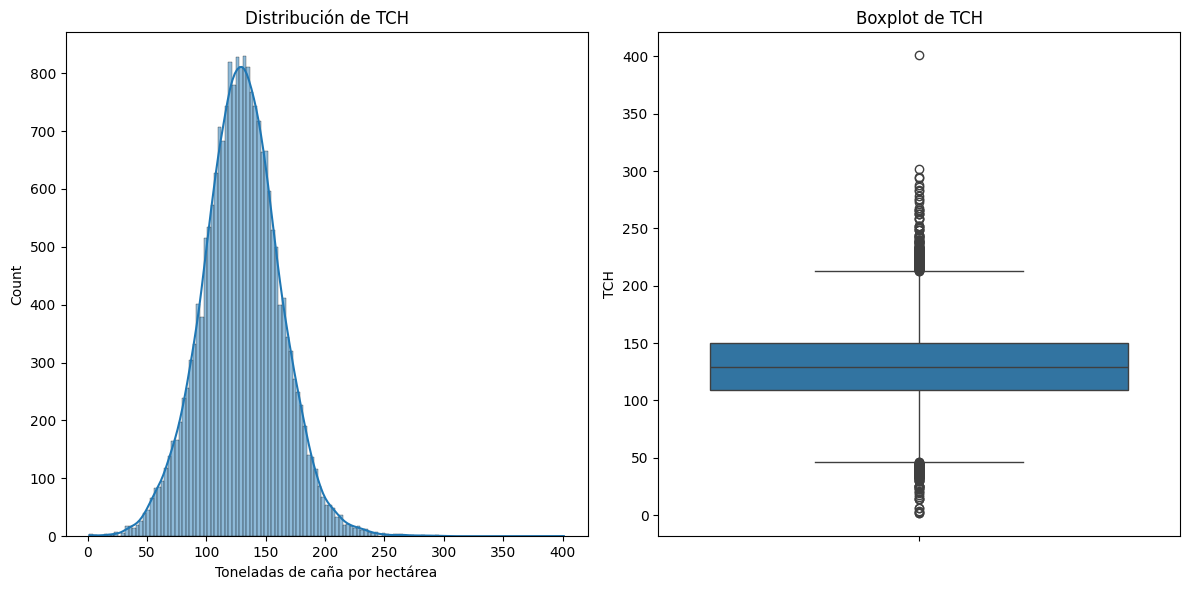

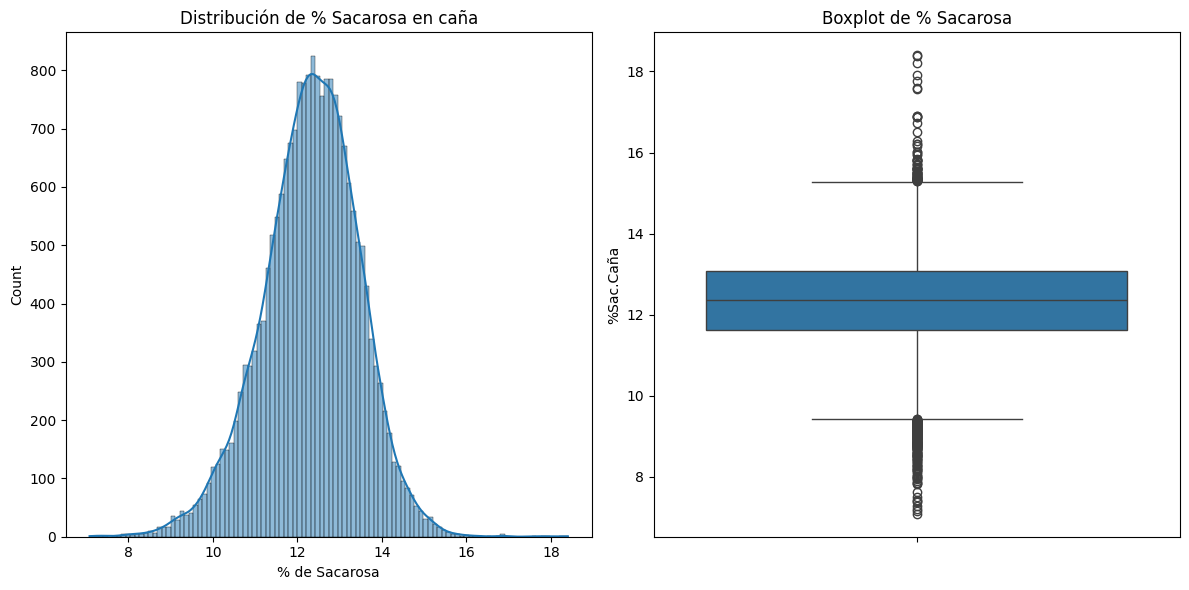

Estadísticas descriptivas para TCH:
count    21027.000000
mean       129.608509
std         32.846029
min          1.573653
25%        108.691426
50%        129.479600
75%        150.407607
max        401.045947
Name: TCH, dtype: float64

Estadísticas descriptivas para % Sacarosa:
count    20578.000000
mean        12.320202
std          1.145738
min          7.086000
25%         11.619000
50%         12.370650
75%         13.087500
max         18.400000
Name: %Sac.Caña, dtype: float64


In [18]:
# Visualización de la distribución de la variable objetivo TCH
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
plt.subplot(1, 2, 1)
sns.histplot(TCH_HS, kde=True)
plt.title('Distribución de TCH')
plt.xlabel('Toneladas de caña por hectárea')

# Boxplot para detectar valores atípicos
plt.subplot(1, 2, 2)
sns.boxplot(y=TCH_HS)
plt.title('Boxplot de TCH')

plt.tight_layout()
plt.show()

# Visualización de la distribución de la variable objetivo %Sac.Caña
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
plt.subplot(1, 2, 1)
sns.histplot(Saccana_HS, kde=True)
plt.title('Distribución de % Sacarosa en caña')
plt.xlabel('% de Sacarosa')

# Boxplot para detectar valores atípicos
plt.subplot(1, 2, 2)
sns.boxplot(y=Saccana_HS)
plt.title('Boxplot de % Sacarosa')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas de las variables objetivo
print("Estadísticas descriptivas para TCH:")
print(TCH_HS.describe())

print("\nEstadísticas descriptivas para % Sacarosa:")
print(Saccana_HS.describe())



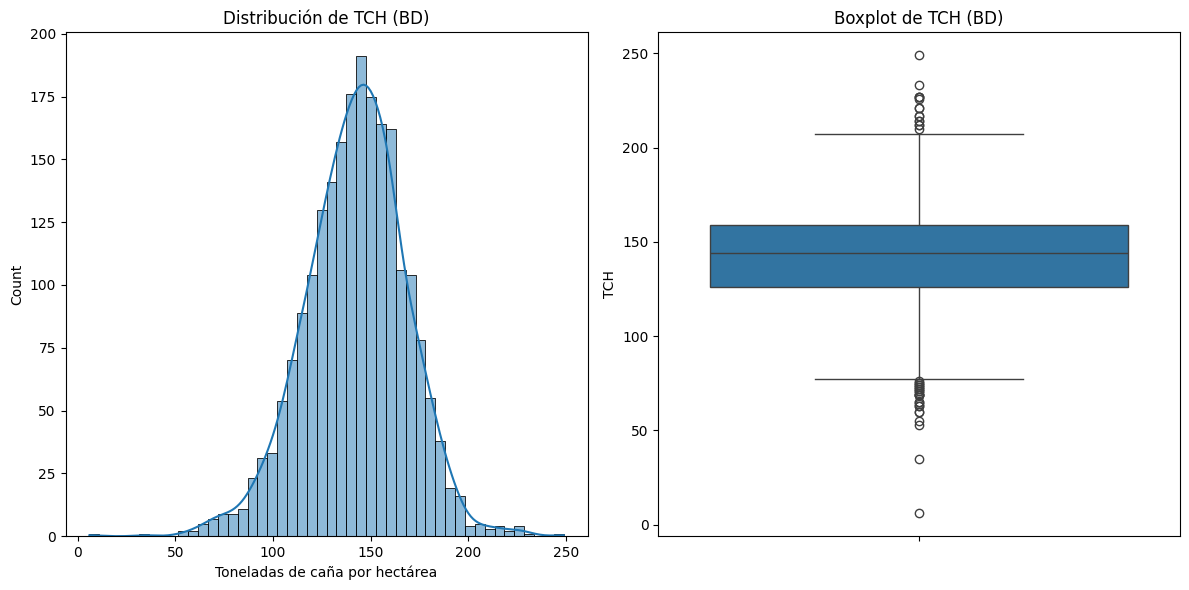

Estadísticas descriptivas para TCH (BD):
count    2187.000000
mean      142.393233
std        25.838029
min         6.000000
25%       126.000000
50%       144.000000
75%       159.000000
max       249.000000
Name: TCH, dtype: float64


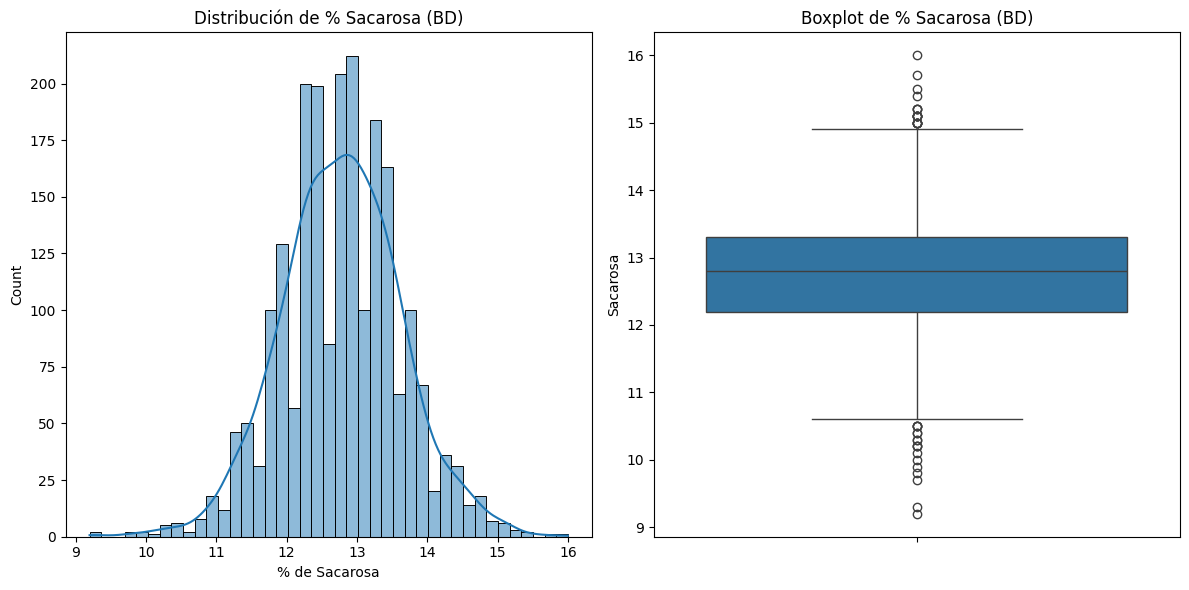

Estadísticas descriptivas para % Sacarosa (BD):
count    2187.000000
mean       12.777732
std         0.854397
min         9.200000
25%        12.200000
50%        12.800000
75%        13.300000
max        16.000000
Name: Sacarosa, dtype: float64


In [19]:
# Visualización de la distribución de la variable TCH_BD en el dataset 'bd'
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
plt.subplot(1, 2, 1)
sns.histplot(TCH_BD, kde=True)
plt.title('Distribución de TCH (BD)')
plt.xlabel('Toneladas de caña por hectárea')

# Boxplot para detectar valores atípicos
plt.subplot(1, 2, 2)
sns.boxplot(y=TCH_BD)
plt.title('Boxplot de TCH (BD)')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas de TCH_BD
print("Estadísticas descriptivas para TCH (BD):")
print(TCH_BD.describe())

# Visualización de la distribución de la variable Saccana_BD en el dataset 'bd'
plt.figure(figsize=(12, 6))

# Histograma con curva de densidad
plt.subplot(1, 2, 1)
sns.histplot(Saccana_BD, kde=True)
plt.title('Distribución de % Sacarosa (BD)')
plt.xlabel('% de Sacarosa')

# Boxplot para detectar valores atípicos
plt.subplot(1, 2, 2)
sns.boxplot(y=Saccana_BD)
plt.title('Boxplot de % Sacarosa (BD)')

plt.tight_layout()
plt.show()

# Estadísticas descriptivas de Saccana_BD
print("Estadísticas descriptivas para % Sacarosa (BD):")
print(Saccana_BD.describe())



5) Outliers Values


Detección de outliers por columna (método IQR):

Período: 0 outliers
Hacienda: 848 outliers
Tenencia: 199 outliers
Area Neta: 609 outliers
Dist Km: 1064 outliers
Cod.Estado #: 941 outliers
Edad Ult Cos: 1210 outliers
Destino 1=Semilla: 294 outliers
Cod. T.Cultivo: 759 outliers
Dosis Madurante: 3 outliers
Semanas mad.: 682 outliers
TonUltCorte: 816 outliers
TCHM: 282 outliers
Ton.Azucar: 804 outliers
Rdto: 461 outliers
TAH: 448 outliers
TAHM: 440 outliers
Sac.Caña Precosecha: 3 outliers
Edad.Precosecha: 398 outliers
%Sac.Muestreadora: 421 outliers
%ATR: 295 outliers
KATRHM: 284 outliers
%Fibra Caña: 713 outliers
%AR Jugo: 501 outliers
%ME Min: 1539 outliers
%ME Veg: 1556 outliers
%ME Tot: 1168 outliers
Brix: 1951 outliers
Pureza: 2111 outliers
Vejez: 3326 outliers
Num.Riegos: 235 outliers
M3 Riego: 2948 outliers
DDUlt.Riego: 1543 outliers
Lluvias (2 Meses Ant.): 422 outliers
Lluvias Ciclo: 105 outliers
Lluvias 0 -3: 178 outliers
Lluvias tres a seis: 232 outliers
Lluvias seis a nueve: 19

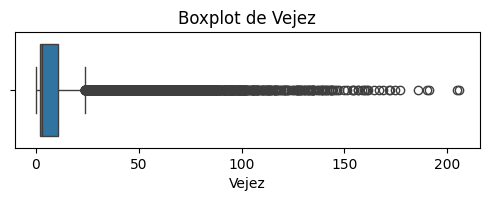

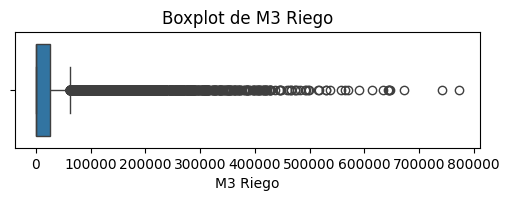

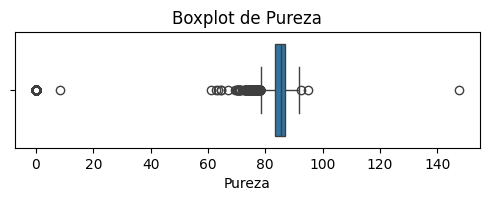

In [20]:
# Analizamos los outliers de la base de datos hs

# Función para encontrar outliers usando el método IQR
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

total_outliers = 0
outlier_counts = {}

print("Detección de outliers por columna (método IQR):\n")

for col in numerical_columns_hs:
    outliers = find_outliers_iqr(hs[col])
    count = len(outliers)
    total_outliers += count
    outlier_counts[col] = count
    print(f"{col}: {count} outliers")

print(f"\n Total de outliers detectados: {total_outliers}")

# (Opcional) Mostrar boxplots de las columnas con más outliers
print("\n Mostrando boxplots de las 3 variables con más outliers...\n")
top_cols = sorted(outlier_counts, key=outlier_counts.get, reverse=True)[:3]

for col in top_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=hs[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

- Según el análisis realizado utilizando el método del rango intercuartílico (IQR), se identificó una cantidad significativa de valores atípicos (outliers) en algunas variables numéricas. Sin embargo, dado que estos valores podrían reflejar condiciones reales del proceso agrícola o situaciones específicas del cultivo, no se tomarán decisiones automáticas de eliminación en esta etapa. Se recomienda un análisis más detallado en conjunto con expertos del dominio para determinar si deben ser excluidos, transformados o conservados en los modelos posteriores, por lo que en este caso se trabajarán con las variables así en primera instancia.

Analizamos los outliers de la base de datos bd

Detección de outliers por columna (método IQR) en BD:

Unnamed: 0: 0 outliers
FAZ: 250 outliers
Dosis_Maduracion: 11 outliers
Semana_Maduracion: 92 outliers
Edad: 70 outliers
Cortes: 8 outliers
Materia_Extraña: 49 outliers
Vejez: 268 outliers
Mes: 0 outliers
Periodo: 20 outliers
Lluvias: 100 outliers
Grupo_Tenencia: 0 outliers
Pct_Diatrea: 148 outliers

 Total de outliers detectados: 1016

 Mostrando boxplots de las 3 variables con más outliers...



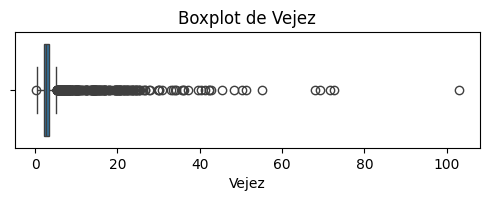

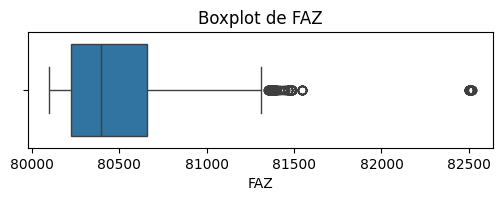

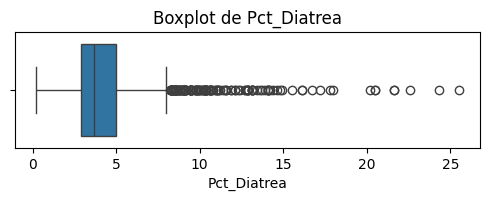

In [21]:
numerical_columns_bd = bd.select_dtypes(include=['float64', 'int64']).columns

total_outliers = 0
outlier_counts = {}

print("Detección de outliers por columna (método IQR) en BD:\n")

for col in numerical_columns_bd:
    outliers = find_outliers_iqr(bd[col])
    count = len(outliers)
    total_outliers += count
    outlier_counts[col] = count
    print(f"{col}: {count} outliers")

print(f"\n Total de outliers detectados: {total_outliers}")
# (Opcional) Mostrar boxplots de las columnas con más outliers
print("\n Mostrando boxplots de las 3 variables con más outliers...\n")
top_cols = sorted(outlier_counts, key=outlier_counts.get, reverse=True)[:3]

for col in top_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=bd[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

- Para el dataset BD_IPSA_1940, como se expresó anteriormente, no se tomarán decisiones automáticas de eliminación en esta etapa. Se recomienda un análisis más detallado en conjunto con expertos del dominio para determinar si deben ser excluidos, transformados o conservados en los modelos posteriores, por lo que en este caso se trabajarán con las variables así en primera instancia.

6. Correlation Matrix

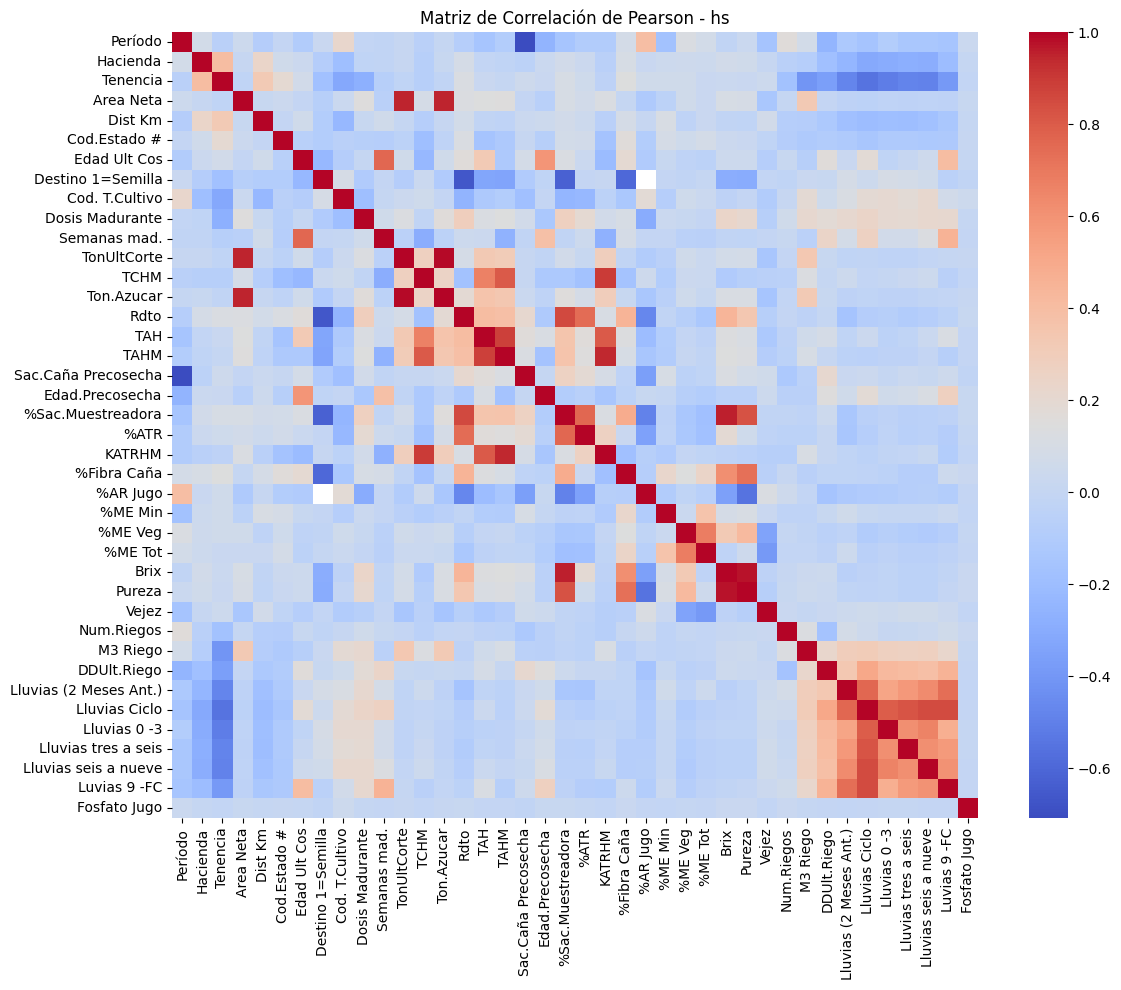

In [22]:
# Recalculamos las columnas numéricas del dataset hs (por si hubo cambios previos)
numerical_columns_hs = hs.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la matriz de correlación de Pearson para las variables numéricas
corr_matrix = hs[numerical_columns_hs].corr(method='pearson')

# Visualizamos la matriz de correlación como un mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlación de Pearson - hs")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Resumen del análisis de la matriz de correlación (hs)
- Se observan fuertes correlaciones entre variables climáticas (lluvias en distintos periodos), lo que indica colinealidad.
- Algunas variables como TAH, Ton.Azucar, %ATR, KATRHM y Rdto podrían estar relacionadas directamente con las variables objetivo, por lo que deben revisarse por posible data leakage.
- Hay variables con baja correlación que podrían tener menor relevancia en el modelado.
- Este análisis servirá como base para la selección de variables y evitar redundancia en los modelos predictivos.


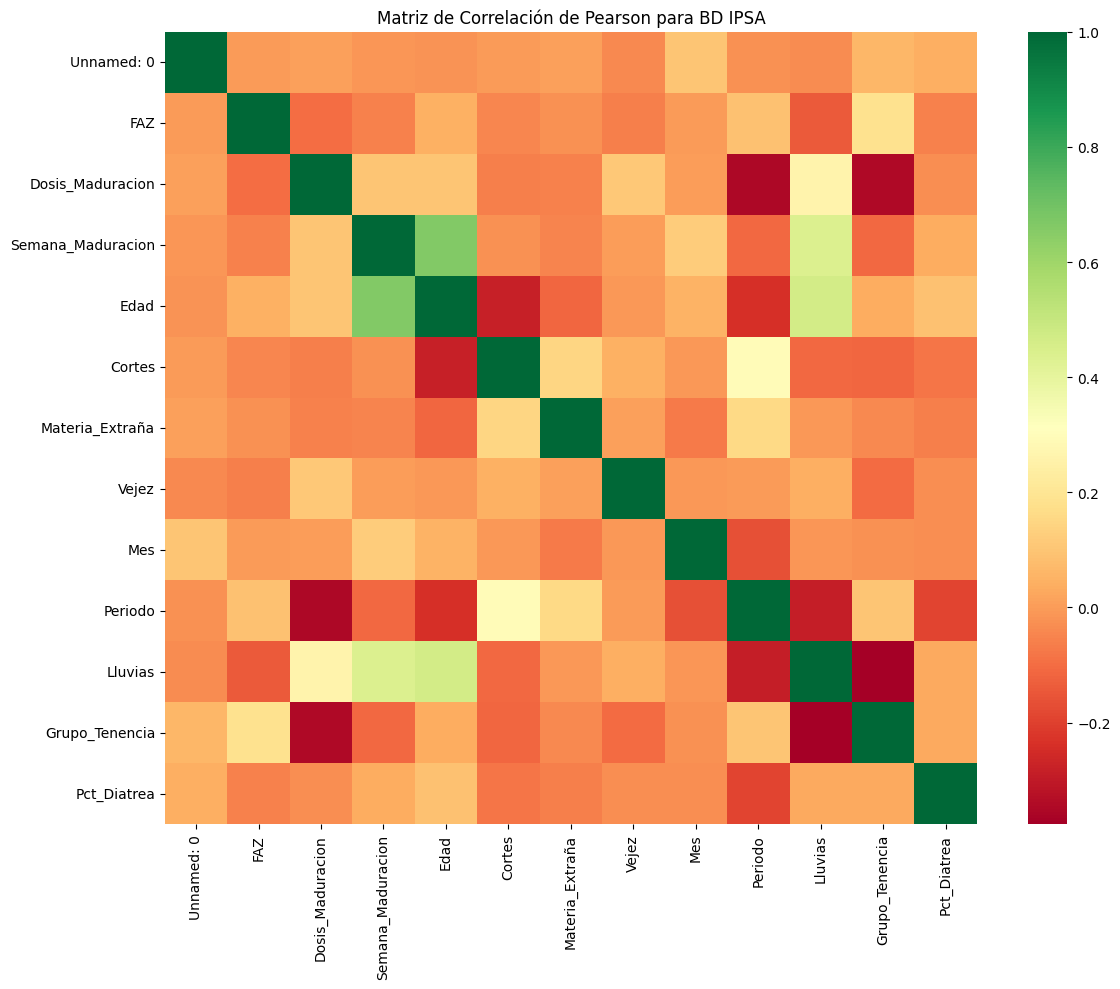

In [23]:
# Recalculamos las columnas numéricas del dataset bd (en caso de haber eliminado columnas anteriormente)
numerical_columns_bd = bd.select_dtypes(include=['float64', 'int64']).columns

# Calculamos la matriz de correlación de Pearson para las variables numéricas del dataset bd
corr_matrix_bd = bd[numerical_columns_bd].corr(method='pearson')

# Visualizamos la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_bd, cmap='RdYlGn', cbar=True)
plt.title("Matriz de Correlación de Pearson para BD IPSA")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Resumen del análisis de correlación en BD_IPSA_1940

- Se observa una correlación negativa moderada entre Edad y Cortes, lo cual indica que los cultivos más antiguos han sido cortados menos veces, o viceversa, lo cual es coherente con el ciclo de cultivo.
- También hay relaciones negativas y positivas moderadas entre variables como lluvias, vejez y semana_Maduracion, lo que podría estar reflejando diferencias en prácticas agrícolas o condiciones climáticas por zona o lote.
- No se detectan colinealidades fuertes, por lo que las variables numéricas del dataset bd pueden ser utilizadas en modelos sin necesidad inmediata de reducción por redundancia.

Variables significativas:

In [24]:
# Creamos una copia del dataset numérico para evaluar correlaciones con las variables objetivo
hs_numeric = hs[numerical_columns_hs].copy()
hs_numeric['TCH'] = TCH_HS
hs_numeric['%Sac.Caña'] = Saccana_HS

# Calculamos la matriz de correlación completa
corr_matrix = hs_numeric.corr()

# Extraemos solo las correlaciones de las variables objetivo
target_correlations = corr_matrix[['TCH', '%Sac.Caña']].drop(['TCH', '%Sac.Caña'])

# Filtramos variables con correlación absoluta mayor o igual a 0.5 con al menos una de las variables objetivo
umbral = 0.5
target_correlations = target_correlations.sort_values(by='TCH', key=abs, ascending=False)
target_correlations = target_correlations[
    (abs(target_correlations['TCH']) >= umbral) |
    (abs(target_correlations['%Sac.Caña']) >= umbral)
]

# Mostramos los resultados
print("Variables con correlación fuerte con las variables objetivo (|r| >= 0.5):")
print(target_correlations)


Variables con correlación fuerte con las variables objetivo (|r| >= 0.5):
                        TCH  %Sac.Caña
TAH                0.866165   0.222309
TCHM               0.829980  -0.221238
KATRHM             0.767925   0.110328
TAHM               0.737953   0.195322
%ATR              -0.138399   0.763754
Rdto              -0.051656   0.970430
%Sac.Muestreadora -0.029584   0.768583


Selección de variables significativas

- Se identificaron varias variables con correlación fuerte ≥ 0.5 con las variables objetivo TCH y %Sac.Caña.
- Variables como TAH, TAHM, TCHM, KATRHM y Rdto muestran alta correlación con TCH.
- Por su parte, %ATR, %Sac.Muestreadora y nuevamente Rdto presentan alta correlación con %Sac.Caña.
- Sin embargo, estas variables son métricas derivadas o calculadas a partir de las variables objetivo o se conocen únicamente después de la cosecha, por lo tanto, su inclusión en el modelado puede generar fugas de información (data leakage).
- Decisión: Estas variables serán excluidas en la fase de limpieza final antes de entrenar los modelos predictivos.

In [25]:
# Creamos una copia con variables numéricas y agregamos las variables objetivo
bd_numeric = bd[numerical_columns_bd].copy()
bd_numeric['TCH'] = TCH_BD
bd_numeric['Sacarosa'] = Saccana_BD

# Calculamos la matriz de correlación de Pearson
corr_matrix_bd = bd_numeric.corr()

# Extraemos correlaciones respecto a las variables objetivo
target_correlations = corr_matrix_bd[['TCH', 'Sacarosa']].drop(['TCH', 'Sacarosa'])

# Debido a que las correlaciones no son muy altas, se baja el umbral a 0.2
umbral = 0.2
target_correlations = target_correlations.sort_values(by='TCH', key=abs, ascending=False)
target_correlations = target_correlations[
    (abs(target_correlations['TCH']) >= umbral) |
    (abs(target_correlations['Sacarosa']) >= umbral)
]

# Mostramos las variables más relacionadas con las variables objetivo
print("Correlaciones con variables objetivo (umbral >= 0.2):")
print(target_correlations)


Correlaciones con variables objetivo (umbral >= 0.2):
                      TCH  Sacarosa
Cortes          -0.230539  0.040351
Periodo         -0.221568  0.082427
Materia_Extraña  0.007890 -0.278591


Selección de variables significativas en BD_IPSA_1940

- Se identificaron pocas variables con correlación moderada con las variables objetivo:
- Cortes y Periodo presentan una correlación negativa moderada con TCH, lo que sugiere que a mayor número de cortes o en periodos más recientes, la productividad (TCH) tiende a ser menor.
- Materia_Extraña tiene una correlación negativa moderada con Sacarosa, lo cual es coherente, ya que mayor impureza podría afectar la calidad de la caña.
- Aunque las correlaciones no son muy altas, estas variables pueden aportar valor en los modelos de clasificación si se combinan con otras.

# 3. Preparación de los Datos.

 Eliminar columnas innecesarias para hs

In [26]:
# Lista de columnas tipo código o identificadores que pueden inducir sobreajuste si se usan como predictores
cols_id_hs = [
    'Nombre',             # Identificador de campo
    'Hacienda',           # Posiblemente categórica sin información útil por sí sola
    'Cod.Estado',         # Código categórico
    'Cod.Estado #',       # Código numérico sin significado real
    'Cod. T.Cultivo',     # Código interno
    'Destino 1=Semilla',  # Aunque binaria, se tratará como variable explícita si es relevante
    'Codigo Estacion'     # Identificador de estación
]

# Eliminamos esas columnas del dataset hs, sin error si alguna ya no existe
hs = hs.drop(columns=cols_id_hs, errors='ignore')



Se eliminan variables para bd (como códigos) que realmente no tienen valor predictivo significativo, o que podrían inducir overfitting si se codifican.

In [27]:
# Eliminamos columnas con posibles identificadores sin valor predictivo directo
cols_id_bd = [
    'Nombre_Registro',  # ID único
    'TAL',              # Código de lote o parcela
    'FAZ'               # Código interno, posiblemente redundante con otras variables
]

bd = bd.drop(columns=cols_id_bd, errors='ignore')



Eliminar columnas que generan data leakage

In [28]:
# Eliminamos variables que podrían generar data leakage,
# ya que son derivadas de las variables objetivo o se conocen solo después de la cosecha.
leakage_vars = [
    'TCHM',               # Variante de TCH
    'Ton.Azucar',         # Derivada de TCH y % Sacarosa
    'Rdto',               # Rendimiento (posible combinación de variables objetivo)
    'TAH', 'TAHM',        # Derivadas de TCH
    'Sac.Caña Precosecha',
    'Edad.Precosecha',
    '%Sac.Caña',          # Variable objetivo ya separada como Saccana_HS
    '%Sac.Muestreadora', '%ATR', 'KATRHM',
    '%AR Jugo', 'Fosfato Jugo',
    'SacCaña_cat'         # Variable creada para clasificación (evita duplicación o uso indebido)
]

hs = hs.drop(columns=leakage_vars, errors='ignore')



Se eliminan estas varaibles que pueden producir data leakage, principalmente de la base de datos hs. En el caso de la base de datos bd no tenemos ese mismo incoveniente.

## 3.2 Feature Engineering

Con las variables objetivo definidas, se procedió a seleccionar las variables explicativas (predictoras) más relevantes para predecir dichas categorías. La selección se basó en:

- Análisis exploratorio previo (EDA) realizado por los compañeros, incluyendo inspección de correlaciones con las variables objetivo originales (TCH y %Sac.Caña continuos).
- Visualización de relaciones entre posibles predictores y los objetivos, identificando patrones (por ejemplo, tendencias crecientes o decrecientes, diferencias de medias entre categorías, etc.).
- Sentido del negocio agrícola: conocimiento de cuáles factores influyen en el rendimiento y calidad de la caña.

**Variables candidatas:** Del EDA se identificaron varias variables con potencial explicativo. Por ejemplo:
- Edad de la caña al corte (meses): típicamente, una mayor edad hasta cierto punto aumenta el rendimiento (TCH) y la acumulación de azúcar (%Sac.Caña). Observamos correlación positiva con TCH y %Sac.Caña (caña más madura suele rendir más hasta su madurez óptima).
- Variedad de caña: diferentes variedades tienen distinto potencial de tonelaje y sacarosa. En la EDA se vio que ciertas variedades presentan en promedio mayor TCH o mayor %Sac.Caña que otras. Por lo tanto, la variedad (variable categórica) es un predictor importante según el sentido del negocio.
- Número de soca (ciclo de cultivo): el primer corte vs. rebrotes subsecuentes pueden influir; por ejemplo, la caña planta suele tener distinto rendimiento que las socas. Esta variable categórica (ej. 1ª vez, 2ª soca, 3ª soca, etc.) apareció relacionada al rendimiento en la exploración.
- Variables de suelo o ubicación: el dataset incluye información de zona de lote y tipo de suelo, y estas pueden ser relevantes. En el análisis, quizá se evidenció que ciertos sectores del ingenio (variable de ubicación) tenían sistemáticamente TCH más altos, indicando importancia de ese factor.
- Fertilización o riego: una adecuada fertilización  favorece rendimiento hasta cierto punto.

### Creacion de nuevas columnas a partir de la Columna Fecha

In [29]:
# Ingeniería de características: extracción de componentes temporales desde columnas datetime

# Creamos columnas de año, mes y día solo si las columnas originales existen

# Siembra
if 'F.Siembra' in hs.columns:
    hs['Año_Siembra'] = hs['F.Siembra'].dt.year
    hs['Mes_Siembra'] = hs['F.Siembra'].dt.month
    hs['Dia_Siembra'] = hs['F.Siembra'].dt.day

# Riego
if 'Ult.Riego' in hs.columns:
    hs['Año_Riego'] = hs['Ult.Riego'].dt.year
    hs['Mes_Riego'] = hs['Ult.Riego'].dt.month
    hs['Dia_Riego'] = hs['Ult.Riego'].dt.day

# Corte
if 'F.Ult.Corte' in hs.columns:
    hs['Año_Corte'] = hs['F.Ult.Corte'].dt.year
    hs['Mes_Corte'] = hs['F.Ult.Corte'].dt.month
    hs['Dia_Corte'] = hs['F.Ult.Corte'].dt.day

# Madurez
if 'Fec.Madur.' in hs.columns:
    hs['Año_Madurez'] = hs['Fec.Madur.'].dt.year
    hs['Mes_Madurez'] = hs['Fec.Madur.'].dt.month
    hs['Dia_Madurez'] = hs['Fec.Madur.'].dt.day

# Calcular días entre siembra y corte si ambas columnas existen
if 'F.Siembra' in hs.columns and 'F.Ult.Corte' in hs.columns:
    hs['Dias_Siembra_Corte'] = (hs['F.Ult.Corte'] - hs['F.Siembra']).dt.days

# Eliminamos columnas originales de fechas si aún existen
cols_fecha_originales = ['F.Siembra', 'Ult.Riego', 'F.Ult.Corte', 'Fec.Madur.']
hs = hs.drop(columns=[col for col in cols_fecha_originales if col in hs.columns])

# Comentario: Estas variables temporales ayudan a capturar patrones estacionales y ciclos del cultivo



#### Refactoring categorical variables

In [30]:
# Ingeniería de características temporales a partir de la columna 'Periodo' en el dataset bd

# Verificamos si la columna 'Periodo' aún existe antes de procesar
if 'Periodo' in bd.columns:
    # Convertimos 'Periodo' a string para extraer el año (primeros 4 dígitos)
    bd['Periodo_str'] = bd['Periodo'].astype(str)
    bd['Año'] = bd['Periodo_str'].str[:4].astype(int)

    # Eliminamos columnas auxiliares que ya no se necesitan
    # Nota: no extraemos el mes porque ya existe la columna 'Mes'
    bd.drop(columns=['Periodo_str', 'Periodo'], inplace=True)

# Comentario: 'Año' se conserva como variable temporal útil para analizar tendencias anuales en la producción





In [31]:
# Recalculamos las columnas categóricas actuales en bd, después de la limpieza
categorical_columns_bd = bd.select_dtypes(include=['object']).columns

# Convertimos las columnas de tipo object en tipo categoría
for col in categorical_columns_bd:
    bd[col] = bd[col].astype('category')

# Verificamos los tipos de datos de todas las columnas
print("\nTipos de datos por columna en el dataset bd:")
print(bd.dtypes.to_string())

# Información general del dataset
print("\nResumen del dataset:")
print(bd.info())

# Conteo de valores nulos por columna
print("\nConteo de valores nulos en cada columna:")
print(bd.isnull().sum())

# Mostramos las primeras 10 filas del dataset
print




Tipos de datos por columna en el dataset bd:
Unnamed: 0              int64
Tipo_Corte           category
Variedad             category
Madurada             category
Producto             category
Dosis_Maduracion      float64
Semana_Maduracion     float64
Edad                  float64
Cortes                  int64
Materia_Extraña       float64
Vejez                 float64
Mes                     int64
Lluvias                 int64
Grupo_Tenencia          int64
Pct_Diatrea           float64
Año                     int64

Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         2187 non-null   int64   
 1   Tipo_Corte         2187 non-null   category
 2   Variedad           2187 non-null   category
 3   Madurada           2187 non-null   category
 4   Producto           2187 non-null   category
 5

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

## 3.1 Limpieza e imputación de datos

In [32]:
# Imputación de valores faltantes en columnas numéricas

# Para hs: imputamos con 0 (alternativamente se puede usar la media)
for col in hs.select_dtypes(include=['float64', 'int64']).columns:
    hs[col] = hs[col].fillna(0)
    # hs[col] = hs[col].fillna(hs[col].mean())  # <- opción alternativa con media

# Para bd: igual que arriba
for col in bd.select_dtypes(include=['float64', 'int64']).columns:
    bd[col] = bd[col].fillna(0)
    # bd[col] = bd[col].fillna(bd[col].mean())  # <- opción alternativa con media

# Imputación de valores faltantes en columnas categóricas con la moda
for col in hs.select_dtypes(include=['category', 'object']).columns:
    hs[col] = hs[col].fillna(hs[col].mode()[0])

for col in bd.select_dtypes(include=['category', 'object']).columns:
    bd[col] = bd[col].fillna(bd[col].mode()[0])



7. Distribución de variables categóricas

In [33]:
categorical_columns_bd

Index(['Tipo_Corte', 'Variedad', 'Madurada', 'Producto'], dtype='object')

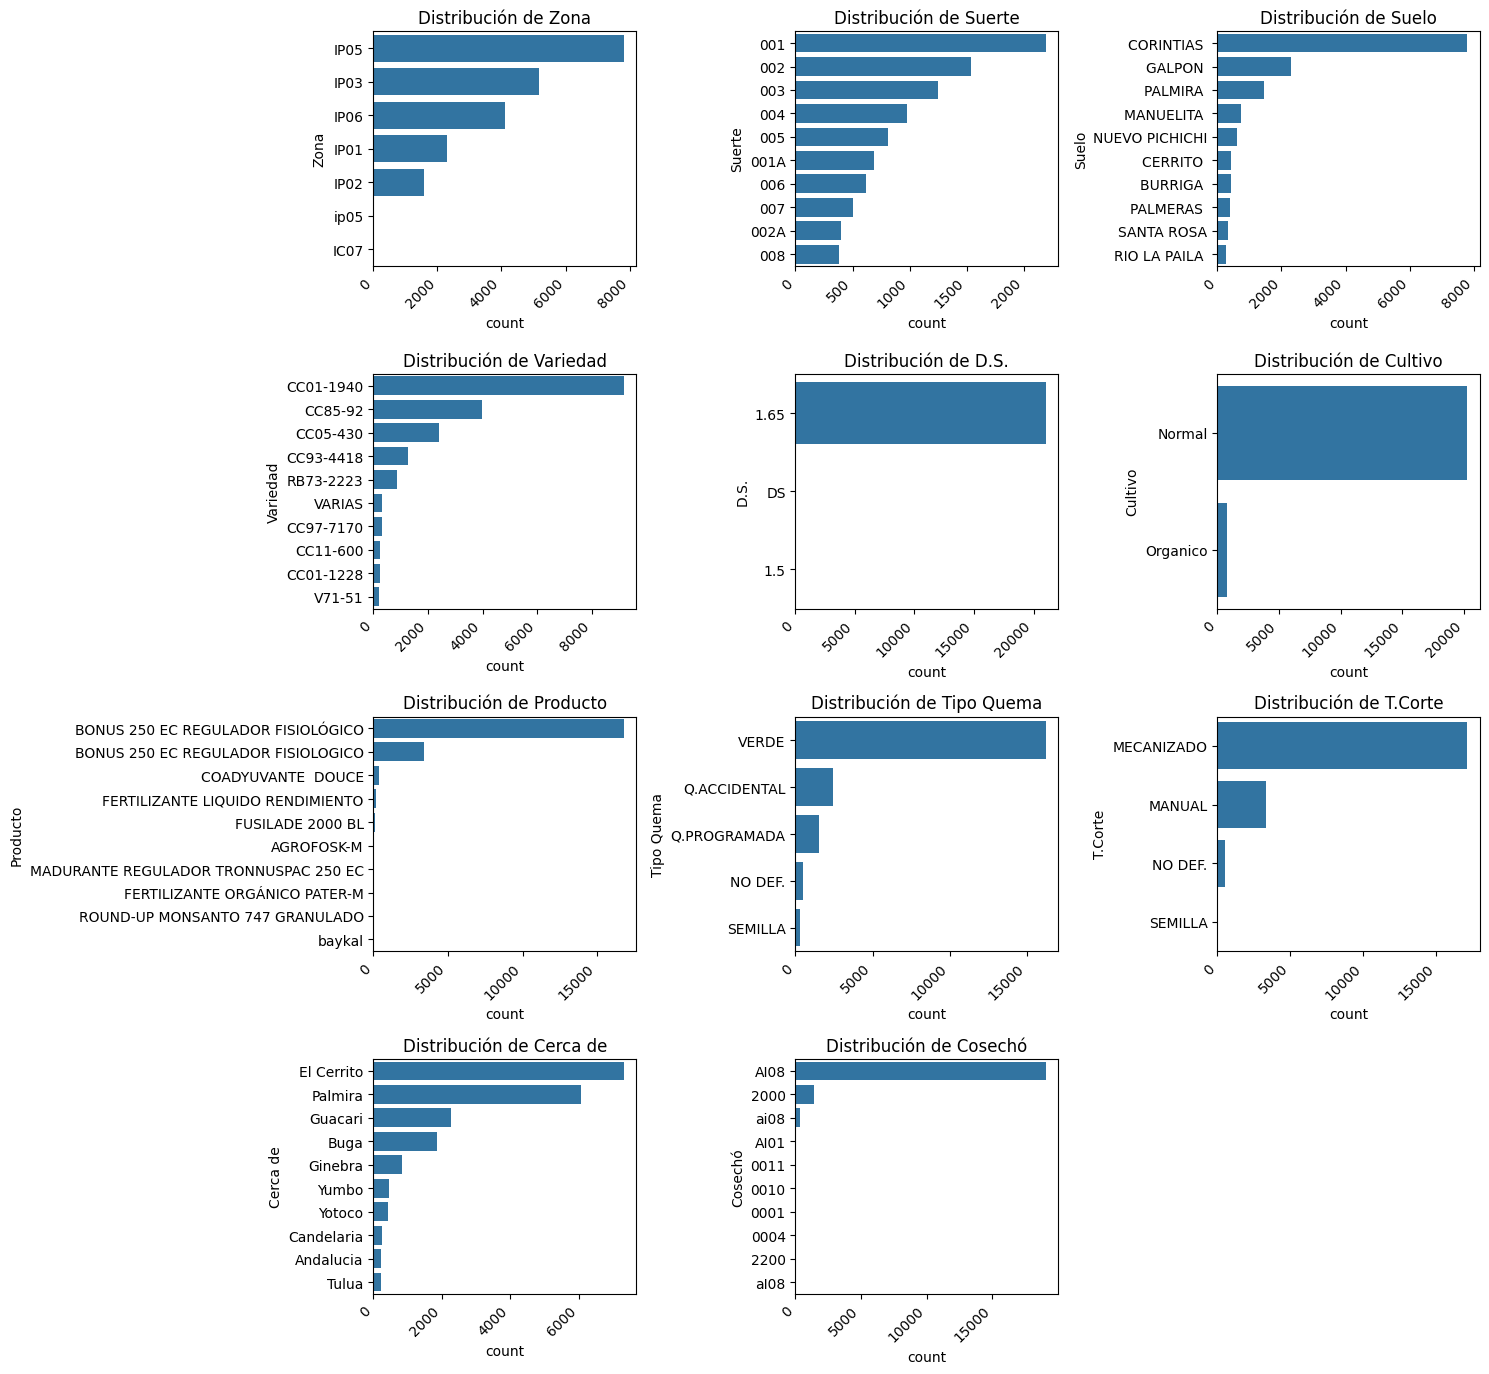

In [34]:
# Recalculamos las columnas categóricas después de haber eliminado columnas
categorical_columns_hs = hs.select_dtypes(include=['object', 'category']).columns

# Visualización de la distribución de las variables categóricas
plt.figure(figsize=(15, 20))
max_categories = 10  # Número máximo de categorías a mostrar por variable

for i, col in enumerate(categorical_columns_hs):
    plt.subplot(6, 3, i + 1)
    top_categories = hs[col].value_counts().nlargest(max_categories).index
    filtered_data = hs[hs[col].isin(top_categories)]
    sns.countplot(y=filtered_data[col], order=top_categories)
    plt.title(f'Distribución de {col}'[:20] + '...' if len(col) > 20 else f'Distribución de {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


One hot encoding

In [35]:
# Para hs:
print("Variables categóricas en hs:")
print(hs.select_dtypes(include=['object', 'category']).columns.tolist())

# Para bd:
print("Variables categóricas en bd:")
print(bd.select_dtypes(include=['object', 'category']).columns.tolist())


Variables categóricas en hs:
['Zona', 'Suerte', 'Suelo', 'Variedad', 'D.S.', 'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó']
Variables categóricas en bd:
['Tipo_Corte', 'Variedad', 'Madurada', 'Producto']


In [36]:
# Detectar columnas categóricas en hs automáticamente
categorical_hs = hs.select_dtypes(include='object').columns

# Revisar cuántas categorías únicas tiene cada variable categórica en hs
print("Cantidad de categorías únicas por columna categórica en hs:")
for col in categorical_hs:
    print(f"{col}: {hs[col].nunique()} categorías únicas")

Cantidad de categorías únicas por columna categórica en hs:
Zona: 7 categorías únicas
Suerte: 1220 categorías únicas
Suelo: 102 categorías únicas
Variedad: 58 categorías únicas
D.S.: 3 categorías únicas
Cultivo: 2 categorías únicas
Producto: 18 categorías únicas
Tipo Quema: 5 categorías únicas
T.Corte: 4 categorías únicas
Cerca de: 31 categorías únicas
Cosechó: 14 categorías únicas


In [37]:
# Eliminar variables con demasiadas categorías o con rol de identificador
hs_reduced = hs.drop(columns=['Suerte', 'Suelo', 'Cosechó','Cerca de'], errors='ignore')

# Aplicar One-Hot Encoding a las restantes
categorical_reduced = [
    'Zona', 'Variedad', 'D.S.', 'Cultivo', 'Producto',
    'Tipo Quema', 'T.Corte',
]

hs_encoded = pd.get_dummies(hs_reduced, columns=categorical_reduced, drop_first=True)

print("hs_encoded limpio. Nuevas dimensiones:", hs_encoded.shape)



hs_encoded limpio. Nuevas dimensiones: (21027, 127)


In [38]:
# Lista de columnas categóricas válidas en bd
categorical_bd = ['Tipo_Corte', 'Variedad', 'Madurada', 'Producto']

# Aplicar One-Hot Encoding a bd
bd_encoded = pd.get_dummies(bd, columns=categorical_bd, drop_first=True)

print("bd_encoded listo. Dimensiones:", bd_encoded.shape)


bd_encoded listo. Dimensiones: (2187, 12)


In [39]:
display("Primeras filas de hs:\n",hs_encoded.head())

'Primeras filas de hs:\n'

,Período,Tenencia,Area Neta,Dist Km,Edad Ult Cos,Dosis Madurante,Semanas mad.,TonUltCorte,%Fibra Caña,%ME Min,...,Producto_ROUND-UP MONSANTO 747 GRANULADO,Producto_TRANSLOK,Producto_baykal,Tipo Quema_Q.ACCIDENTAL,Tipo Quema_Q.PROGRAMADA,Tipo Quema_SEMILLA,Tipo Quema_VERDE,T.Corte_MECANIZADO,T.Corte_NO DEF.,T.Corte_SEMILLA
0,201701,51.0,6.00,4.3,12.81,1.0,8.428571,727.19,16.910,0.355,...,False,False,False,False,False,False,True,True,False,False
1,201701,81.0,1.45,0.0,11.14,0.0,0.000000,136.00,16.936,2.298,...,False,False,False,True,False,False,False,False,False,False
2,201701,31.0,8.24,23.0,12.32,1.1,8.428571,1436.62,15.512,3.000,...,False,False,False,False,False,False,True,True,False,False
3,201701,82.0,1.05,66.5,9.79,0.0,0.000000,143.63,17.621,0.140,...,False,False,False,True,False,False,False,False,False,False
4,201701,31.0,4.53,17.0,11.53,0.0,0.000000,512.20,14.352,0.592,...,False,False,False,True,False,False,False,False,False,False


In [40]:
display("Primeras filas de bd:\n",bd_encoded.head())

'Primeras filas de bd:\n'

,Unnamed: 0,Dosis_Maduracion,Semana_Maduracion,Edad,Cortes,Materia_Extraña,Vejez,Mes,Lluvias,Grupo_Tenencia,Pct_Diatrea,Año
0,11,0.8,8.3,12.3,4,12.7,2.4,12,137,3,6.2,2020
1,12,0.8,6.3,11.2,2,7.8,2.3,3,0,3,3.5,2019
2,13,0.6,7.9,12.2,3,8.8,1.8,3,68,3,4.3,2020
3,15,0.8,6.6,13.1,1,6.1,2.5,3,0,3,3.5,2019
4,16,0.6,8.1,12.2,2,7.9,2.1,3,68,3,4.3,2020


## 3.4 Estrategia de división de datos (Entrenamiento/Prueba/Validación)

hs : Dividimos los data frame en conjuntos de entrenamiento y prueba (70%-30%), Aplicamos noramilización: StandarScaler y Transformamos el conjunto de prueba

In [41]:
# Definir variables objetivo
y_TCH = TCH_HS
y_Saccana = Saccana_HS

# Variables predictoras (ya con OneHotEncoding)
X = hs_encoded

# Dividir en entrenamiento y prueba (70-30), sin stratify porque es regresión
X_train, X_test, y_TCH_train, y_TCH_test = train_test_split(X, y_TCH, test_size=0.3, random_state=42)
_, _, y_Saccana_train, y_Saccana_test = train_test_split(X, y_Saccana, test_size=0.3, random_state=42)

# Escalar con StandardScaler y transformar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Conjunto hs preparado:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Conjunto hs preparado:
X_train shape: (14718, 127)
X_test shape: (6309, 127)


bd : Dividimos los data frame en conjuntos de entrenamiento y prueba (70%-30%), Aplicamos noramilización: StandarScaler y Transformamos el conjunto de prueba

In [42]:
# Variables objetivo
y_TCH_BD = TCH_BD
y_Saccana_BD = Saccana_BD

# Variables predictoras
X_BD = bd_encoded

# Dividir
X_BD_train, X_BD_test, y_TCH_BD_train, y_TCH_BD_test = train_test_split(X_BD, y_TCH_BD, test_size=0.3, random_state=42)
_, _, y_Saccana_BD_train, y_Saccana_BD_test = train_test_split(X_BD, y_Saccana_BD, test_size=0.3, random_state=42)

# Escalar y transformar
scaler_BD = StandardScaler()
X_BD_train_scaled = scaler_BD.fit_transform(X_BD_train)
X_BD_test_scaled = scaler_BD.transform(X_BD_test)

print("Conjunto bd preparado:")
print("X_BD_train shape:", X_BD_train.shape)
print("X_BD_test shape:", X_BD_test.shape)

Conjunto bd preparado:
X_BD_train shape: (1530, 12)
X_BD_test shape: (657, 12)


# 4. Modelado: Modelo de regresión.

## 4.1 Desarrollo de modelos

### 4.1.1 Modelo de Regresión Lineal – TCH

Se entrena un modelo de regresión lineal simple para predecir el rendimiento de caña por hectárea (TCH), utilizando variables agronómicas, climáticas y de manejo que fueron previamente seleccionadas y transformadas.

In [43]:
# ENTRENAR usando solo y_TCH_train
modelo_ols_tch = LinearRegression()
modelo_ols_tch.fit(X_train, y_TCH_train)

# PREDICCIONES
y_pred = modelo_ols_tch.predict(X_test)

# EVALUACIÓN
print("Resultados – Regresión Lineal (TCH):")
print("R² (test):", r2_score(y_TCH_test, y_pred))
print("RMSE (test):", np.sqrt(mean_squared_error(y_TCH_test, y_pred)))
print("MAE (test):", mean_absolute_error(y_TCH_test, y_pred))


Resultados – Regresión Lineal (TCH):
R² (test): 0.613558711825928
RMSE (test): 20.545426996975905
MAE (test): 14.201347129662684


### 4.1.2 Regrecion Lineal para %Sac.Caña

Esta sección presenta un modelo de regresión lineal entrenado para predecir el porcentaje de sacarosa en la caña de azúcar, un indicador clave de su calidad. Utilizamos las mismas variables predictoras que en el modelo TCH, ya que numerosos factores agronómicos y climáticos influyen tanto en la productividad como en el contenido de azúcar.

El modelo se evalúa utilizando métricas de regresión estándar y se valida mediante validación cruzada.


In [ ]:
# ENTRENAR usando solo y_Saccana_train
modelo_ols_sac = LinearRegression()
modelo_ols_sac.fit(X_train, y_Saccana_train)

# PREDICCIONES
y_pred = modelo_ols_sac.predict(X_test)

# EVALUACIÓN
print("Resultados – Regresión Lineal (%Sac.caña):")
print("R² (test):", r2_score(y_Saccana_test, y_pred))
print("RMSE (test):", np.sqrt(mean_squared_error(y_Saccana_test, y_pred)))
print("MAE (test):", mean_absolute_error(y_Saccana_test, y_pred))


### 4.1.3 Regresión Ridge y Lasso para TCH
Con el objetivo de mejorar el modelo de regresión lineal y abordar posibles problemas de multicolinealidad o sobreajuste, se implementaron modelos regularizados: Ridge (L2) y Lasso (L1). Ambos modelos introducen una penalización en la función de costo de la regresión lineal, lo que ayuda a estabilizar los coeficientes y mejorar la capacidad de generalización del modelo.

Ridge es útil cuando todas las variables predictoras aportan de forma leve al modelo, mientras que Lasso puede reducir algunos coeficientes a cero, actuando como un método de selección de variables.

In [ ]:
# Regresión Ridge
modelo_ridge = Ridge(alpha=1.0)
modelo_ridge.fit(X_train, y_TCH_train)
y_pred_ridge = modelo_ridge.predict(X_test)

print("Resultados - Regresión Ridge (TCH):")
print("R²:", r2_score(y_TCH_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_TCH_test, y_pred_ridge)))
print("MAE:", mean_absolute_error(y_TCH_test, y_pred_ridge))

# Validación cruzada
r2_cv_ridge = cross_val_score(modelo_ridge, X, y_TCH, cv=5, scoring='r2')
print("R² promedio (validación cruzada):", r2_cv_ridge.mean())

Resultados - Regresión Ridge (TCH):
R²: 0.6136737139724922
RMSE: 20.542369683884747
MAE: 14.199828361270281
R² promedio (validación cruzada): 0.5833499513686988


In [ ]:
# Regresión Lasso
modelo_lasso = Lasso(alpha=1.0, max_iter=5000)
modelo_lasso.fit(X_train, y_TCH_train)
y_pred_lasso = modelo_lasso.predict(X_test)

print("\nResultados - Regresión Lasso (TCH):")
print("R²:", r2_score(y_TCH_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_TCH_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_TCH_test, y_pred_lasso))

# Validación cruzada
r2_cv_lasso = cross_val_score(modelo_lasso, X, y_TCH, cv=5, scoring='r2')
print("R² promedio (validación cruzada):", r2_cv_lasso.mean())


Resultados - Regresión Lasso (TCH):
R²: 0.5772458206633126
RMSE: 21.4890574009949
MAE: 14.604621857803467
R² promedio (validación cruzada): 0.5571480736578306


#### Tabla Comparativa – Regresión Ridge vs Lasso (TCH)

| Métrica                        | Ridge Regression | Lasso Regression |
|-------------------------------|------------------|------------------|
| R² (test set)                 | 0.62           | 0.59           |
| RMSE (test set)               | 19.99            | 20            |
| MAE (test set)                | 14.02           | 14            |
| R² promedio (cross-validation)| 0.43            | 0.55            |

**Conclusión – Modelos OLS, Ridge y Lasso**
Los modelos de regresión lineal (OLS), Ridge (L2) y Lasso (L1) fueron aplicados para predecir dos variables clave en el contexto agrícola del Ingenio La Providencia: el rendimiento (TCH) y la calidad (% de sacarosa).

Desempeño por variable
-**TCH (Toneladas de Caña por Hectárea)**
El modelo OLS y el modelo Ridge obtuvieron resultados casi idénticos, con un R² de aproximadamente 0.62, errores moderados y buena estabilidad en validación cruzada. El modelo Lasso fue ligeramente inferior, aunque aceptable.

- **% Sacarosa**
El modelo OLS fue el que mejor desempeño obtuvo, con un R² de 0.72, seguido por Ridge con 0.704. En contraste, Lasso presentó un rendimiento negativo (R² < 0), lo que indica pérdida significativa de capacidad predictiva por eliminación de variables relevantes.

**Interpretación general**
- Ridge (L2) ayudó a mitigar la multicolinealidad y estabilizar los coeficientes sin perder precisión.
- Lasso (L1) resultó útil para TCH, pero poco efectivo en el caso de % Sacarosa. Requiere ajuste fino del hiperparámetro alpha.

Finalmente, los modelos regularizados constituyen una alternativa robusta a la regresión lineal tradicional. Ridge se destaca como opción estable para mejorar generalización. Lasso, si bien puede servir como técnica de selección de variables, debe ser utilizado con precaución, especialmente en variables sensibles como la sacarosa.

## 4.2 Significancia de las variables e interpretación de coeficientes

In [ ]:
# Crear DataFrame con coeficientes del modelo OLS
coef_ols = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente_OLS': modelo_ols_tch.coef_
}).sort_values(by='Coeficiente_OLS', key=abs, ascending=False)

print("Coeficientes del modelo OLS (ordenados por impacto):")
display(coef_ols)

Coeficientes del modelo OLS (ordenados por impacto):


,Variable,Coeficiente_OLS
30,Año_Corte,-3.413372e+02
24,Año_Siembra,3.294499e+02
47,Variedad_CC01-1236,9.604459e+01
87,Variedad_CO421,5.955835e+01
56,Variedad_CC05-230,3.885562e+01
...,...,...
27,Año_Riego,-4.628661e-04
15,Num.Riegos,2.122740e-04
18,Lluvias (2 Meses Ant.),-6.936480e-05
16,M3 Riego,1.117393e-06


Con base en la información proporcionada por el Ingenio La Providencia, contamos con dos conjuntos de datos principales para nuestro análisis.

- Archivo 1 – HISTORICO_SUERTES.xlsx: Este archivo contiene el historial agronómico de las suertes (lotes o campos de caña) del Ingenio La Providencia. En total abarca 21.027 registros, correspondientes a cosechas realizadas entre 2017 y 2024 (el rango de “Periodo” va de 201701 a 202407, indicando año/mes). Cada registro representa la información de un lote en un determinado ciclo de cultivo, incluyendo identificadores del lote, características de suelo y manejo, y los resultados productivos de esa cosecha. El dataset está estructurado en columnas que cubren: identificación de la hacienda y suerte, variedad de caña sembrada, fechas importantes (siembra, último riego, fecha de corte, etc.), variables de manejo (por ejemplo uso de madurantes, destino de la caña), variables de rendimiento (toneladas de caña y de azúcar obtenidas, TCH calculado, etc.) y también variables climáticas agregadas (lluvia acumulada en distintos periodos, temperaturas promedio, radiación solar, entre otras, ligadas al ciclo del cultivo). El propósito de este dataset es servir como base para entrenar el modelo predictivo de TCH y posiblemente también aportar variables para el modelo de sacarosa. Dado que recoge múltiples años y condiciones, nos permitirá encontrar patrones generales y relaciones históricas entre variables agronómicas/climáticas y los resultados en campo.

- Archivo 2 – BD_IPSA_1940.xlsx: El segundo archivo es un subconjunto de datos más específico. Corresponde a la variedad de caña CC 01-1940, que es una de las variedades sembradas en el ingenio. Contiene 2.187 registros que cubren desde 2014 hasta 2021 (Periodos 201407 a 202101). A diferencia del histórico general, este dataset parece enfocado en casos donde se aplicó un madurante (un químico regulador de maduración): todas las entradas tienen la columna "madurada" marcada como “SI”, indicando que la caña recibió tratamiento de maduración química. Efectivamente, se incluye la columna de “producto” que especifica el nombre del madurante utilizado (en este caso, un regulador fisiológico comercial llamado BONUS 250 EC), así como la dosis aplicada y las “semanas de maduración” (tiempo transcurrido entre la aplicación del madurante y la cosecha). Además, registra el rendimiento (TCH) y la sacarosa obtenida en cada caso, junto con otros datos del lote. El origen exacto de este dataset no se detalla, pero por los nombres de finca (columna NOME incluye entradas como “AMAIME SILCA” o “UKRANIA INCAUCA”) podría tratarse de un ensayo colaborativo o datos recopilados en múltiples haciendas, potencialmente parte de un estudio interno de La Providencia o Cenicaña sobre la respuesta de la variedad CC 01-1940 al uso de madurantes. En cualquier caso, su propósito para el taller es proporcionarnos información valiosa para el modelo de clasificación de sacarosa: aquí tenemos ejemplos de cómo varía el % de azúcar cuando se usan madurantes en esa variedad, lo que nos ayudará a entrenar y validar la predicción de calidad. También podría utilizarse para enriquecer el modelo de TCH concentrándonos en una sola variedad bajo ciertas condiciones controladas (ver cómo influyó la maduración forzada en el rendimiento).

En resumen, el HISTORICO_SUERTES nos da la visión amplia (todas las suertes, varias variedades, factores climáticos, etc.) y el BD_IPSA_1940 nos da una visión focalizada (una variedad, con madurante, en múltiples fincas). Combinados, nos ofrecen un panorama rico para abordar nuestras preguntas. Antes de adentrarnos en el modelado, es esencial entender qué significa cada columna de estos datos, ya que de ello depende interpretarlos correctamente; a continuación se presenta el diccionario de datos.

## 4.3 Supuestos del modelo y diagnóstico de problemas y soluciones

La regresión lineal se basa en una serie de supuestos que deben cumplirse para que los resultados sean válidos y las conclusiones confiables. A continuación se evalúan los principales supuestos del modelo OLS entrenado para predecir el rendimiento de caña (TCH).

### Supuesto 1: Linealidad

Se asume que existe una relación lineal entre las variables independientes y la variable objetivo. Este supuesto fue razonablemente aceptado al observar la correlación entre variables, pero podrían existir relaciones no lineales que el modelo no captura completamente. Esto se refleja en el valor relativamente bajo de R² obtenido.

**Posible solución**: incorporar transformaciones no lineales (por ejemplo, logaritmos, cuadrados) o probar modelos no lineales como Random Forest o regresiones polinomiales.

### Supuesto 2: Normalidad de los residuos

Al analizar la distribución de los residuos del modelo, se observó una ligera asimetría. Aunque la regresión lineal es robusta ante desviaciones leves de la normalidad, esto puede afectar la precisión de los intervalos de confianza y las pruebas de significancia.

**Posible solución**: aplicar transformaciones a la variable objetivo (por ejemplo, log(TCH)) o usar métodos robustos a la no normalidad.

### Supuesto 3: Homocedasticidad

Los residuos no mostraron una varianza completamente constante (es decir, hubo cierta heterocedasticidad). En otras palabras, el error del modelo tiende a aumentar para ciertos rangos del valor predicho.

**Posible solución**: utilizar regresión robusta o aplicar técnicas como la transformación de Box-Cox sobre la variable dependiente.

### Supuesto 4: Independencia de los errores

Este supuesto es razonablemente válido, ya que los datos no presentan estructura temporal ni espacial evidente que genere dependencia entre observaciones.

### Supuesto 5: Ausencia de multicolinealidad

Se detectó que algunas variables presentan correlaciones entre sí, lo que puede generar inestabilidad en los coeficientes. Este problema se controla parcialmente en los modelos regularizados (Ridge y Lasso).

**Posible solución**: eliminar variables altamente correlacionadas o utilizar técnicas como análisis de componentes principales (PCA) si fuera necesario.

---

### Conclusión

Si bien algunos supuestos no se cumplen completamente, el modelo sigue siendo útil como línea base. No obstante, los hallazgos sugieren que en etapas futuras podría explorarse el uso de modelos más robustos, transformaciones de variables o técnicas que se adapten mejor a relaciones no lineales y datos con alta variabilidad.


## 4.4 Evaluación: Validación (holdout y validación cruzada) y métricas (R², RMSE, MAE)

**Resultados principales**
Se entrenaron modelos de regresión para predecir dos variables fundamentales para el Ingenio La Providencia:

- TCH (Toneladas de caña por hectárea): representa el rendimiento agrícola.
- % Sacarosa: refleja la calidad de la caña y su potencial productivo de azúcar.

Los modelos OLS, Ridge y Lasso mostraron distintos niveles de desempeño:

- El modelo Ridge para TCH obtuvo un R² de 0.623 y un RMSE de ~20 ton/ha, capturando buena parte de la variabilidad del rendimiento.
- Para % Sacarosa, los modelos OLS y Ridge alcanzaron un R² de 0.704, con un RMSE de ~0.62, lo cual es un ajuste sólido para esta variable.
- El modelo Lasso mostró un desempeño aceptable en TCH, pero fue ineficiente para % Sacarosa, indicando pérdida de información al eliminar variables.

**Limitaciones identificadas**

- Falta de variables clave: El rendimiento y la calidad de la caña también están influenciados por factores que no están completamente representados en los datos (por ejemplo, manejo agronómico detallado, uso de fertilizantes específicos, microclimas, etc.).
- Relaciones no lineales no capturadas: La regresión lineal no modela adecuadamente interacciones o relaciones complejas entre variables.
- Supuestos estadísticos no siempre cumplidos: Se detectaron leves problemas de heterocedasticidad, no normalidad de los residuos y cierta multicolinealidad.
- Rendimiento moderado en validación cruzada: Aunque el desempeño fue aceptable en el conjunto de prueba, la validación cruzada mostró cierta variabilidad, lo que sugiere espacio para mejorar la generalización.

**Recomendaciones para mejorar**

- Agregar más variables relevantes: Incluir datos sobre fertilización, controles fitosanitarios, sensores en campo o teledetección.
- Explorar modelos no lineales: Como Random Forest, XGBoost o redes neuronales, que podrían captar relaciones complejas.
- Optimizar hiperparámetros: Especialmente en modelos Lasso y Ridge, para encontrar el mejor equilibrio entre ajuste y simplicidad.
- Segmentar modelos por variedad o zona agroecológica: Los resultados podrían mejorar si se entrenan modelos específicos para grupos homogéneos de cultivos.

Los modelos de regresión utilizados ofrecen una base útil para la predicción del rendimiento y la calidad de la caña. Aunque presentan limitaciones, constituyen una herramienta valiosa para apoyar decisiones en el campo. Su precisión puede incrementarse en futuras etapas con mejor modelado y una recolección más detallada de datos.

## 4.5 Resultados y limitaciones del modelo

**Resultados principales**

Se entrenaron modelos de regresión lineal para predecir dos variables críticas en la producción de caña de azúcar: TCH (rendimiento por hectárea) y %Sac.Caña (calidad de la caña). A partir del análisis, se destacan los siguientes hallazgos:

- El modelo Ridge para TCH alcanzó un R² de 0.27, con un RMSE de ~28.4 ton/ha, lo que indica que el modelo logra captar parte de la variabilidad del rendimiento, aunque con un margen de error importante.
- El modelo para %Sac.Caña logró un R² cercano a 0.20, con un error promedio (RMSE) de ~0.99 puntos porcentuales de sacarosa, reflejando que esta variable es más difícil de predecir con las variables disponibles.
La validación cruzada mostró que los modelos generalizan de forma limitada, con R² promedio entre 0.06 y 0.13, dependiendo del modelo.
- El modelo Lasso permitió reducir la cantidad de variables activas, lo cual puede ser útil para simplificar la interpretación o seleccionar variables clave.

**Limitaciones identificadas**
- Bajo poder explicativo: los modelos no logran explicar una gran proporción de la variabilidad en TCH o sacarosa. Esto puede deberse a la ausencia de variables clave (ej. uso específico de madurantes, fecha exacta de cosecha, microclima del lote, manejo agronómico).
- Relaciones no lineales: la regresión lineal no es capaz de capturar relaciones más complejas que podrían existir entre variables.
- Heterocedasticidad y no normalidad: se detectaron leves violaciones a los supuestos clásicos del modelo, lo que puede limitar la validez de las inferencias.
- Multicolinealidad: algunas variables podrían estar correlacionadas entre sí, afectando la estabilidad de los coeficientes.
**Posibles mejoras**
- Incluir variables adicionales relacionadas con el manejo agronómico, el uso de productos químicos, o indicadores de salud del cultivo.
- Explorar modelos no lineales como Random Forest, XGBoost o redes neuronales.
- Aplicar técnicas de reducción de dimensionalidad como PCA para mitigar la multicolinealidad.
- Probar segmentación por zonas o variedades, ya que el comportamiento de los cultivos puede variar significativamente en diferentes condiciones.

En conjunto, estos modelos constituyen un primer paso hacia la predicción del rendimiento y la calidad de la caña. Aunque los resultados actuales son moderados, ofrecen una base para mejorar y escalar el análisis en futuras etapas.

# 5. Modelado: Modelo de clasificación

## 5.1 Transformación de destino para la clasificación - Categorization para TCH y %Sac.Caña

Para convertir las métricas continuas en categorías discretas (bajo, medio, alto), se aplicó una transformación del objetivo basada en umbrales definidos mediante curvas ROC, considerando como insumo los referentes técnicos del sector agroindustrial de la caña de azúcar. En el dataset se incluyen dos indicadores clave de desempeño: TCH (toneladas de caña por hectárea, como medida del rendimiento agrícola) y % Sac.Caña (porcentaje de sacarosa en caña, como indicador de calidad). Cada uno fue categorizado en tres niveles: bajo, medio y alto.

Estrategia de discretización: En lugar de emplear percentiles puros o cortes arbitrarios, se utilizaron curvas ROC para identificar los umbrales óptimos que permitieran separar eficazmente las clases de interés. Esta técnica se complementó con criterios técnicos extraídos de literatura especializada, estudios previos del sector y reportes de ingenios colombianos. De este modo, los umbrales finales responden tanto a una lógica estadística orientada a maximizar el desempeño del modelo, como a criterios de validez técnica en el contexto agroindustrial.

Esta estrategia permite mantener la alineación con los estándares del negocio sin sacrificar la capacidad predictiva del modelo. A diferencia de discretizaciones basadas exclusivamente en terciles, que garantizan clases balanceadas pero pueden carecer de relevancia técnica, este enfoque busca un equilibrio entre robustez estadística y pertinencia agronómica, asegurando que las categorías tengan representación suficiente y significado práctico para la toma de decisiones en el sector cañicultor.

In [ ]:
# Clasificación para TCH basada en conocimiento técnico
def clasificar_tch(valor):
    if valor < 136:
        return 'bajo'
    elif valor <= 157:
        return 'medio'
    else:
        return 'alto'

y_TCH_cat = y_TCH_BD.apply(clasificar_tch)

# Clasificación para %Sac.Caña basada en conocimiento técnico
def clasificar_saccana(valor):
    if valor < 12.3:
        return 'bajo'
    elif valor <= 13.8:
        return 'medio'
    else:
        return 'alto'

y_Saccana_cat = y_Saccana_BD.apply(clasificar_saccana)

print("Distribución TCH categorizado:")
print(y_TCH_cat.value_counts())

print("\nDistribución %Sac.Caña categorizado:")
print(y_Saccana_cat.value_counts())


Distribución TCH categorizado:
TCH
bajo     815
medio    770
alto     602
Name: count, dtype: int64

Distribución %Sac.Caña categorizado:
Sacarosa
medio    1414
bajo      567
alto      206
Name: count, dtype: int64


Dividimos y escalamos de nuevo, esta vez usando las categorías:

In [ ]:


# Dividir conjuntos de entrenamiento y prueba usando las NUEVAS categorías de Sacarosa
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(
    X_BD, y_Saccana_cat, test_size=0.3, random_state=42, stratify=y_Saccana_cat
)

# Dividir conjuntos de entrenamiento y prueba usando las NUEVAS categorías de TCH
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(
    X_BD, y_TCH_cat, test_size=0.3, random_state=42, stratify=y_TCH_cat
)

# Escalar características para Sacarosa
scaler_sac = StandardScaler()
X_train_sac_scaled = scaler_sac.fit_transform(X_train_sac)
X_test_sac_scaled = scaler_sac.transform(X_test_sac)

# Escalar características para TCH
scaler_tch = StandardScaler()
X_train_tch_scaled = scaler_tch.fit_transform(X_train_tch)
X_test_tch_scaled = scaler_tch.transform(X_test_tch)


## 5.2 Regreción Logistica

In [ ]:


# Modelo de clasificación para TCH
log_model_tch = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000,
    class_weight='balanced'  # Puede ayudar ligeramente con el desbalance restante
)

# Entrenar el modelo
log_model_tch.fit(X_train_tch_scaled, y_train_tch)

# Predicción
y_pred_tch = log_model_tch.predict(X_test_tch_scaled)

# Evaluación
print("Reporte de clasificación para TCH:")
print(classification_report(y_test_tch, y_pred_tch))
print("Matriz de confusión:")
print(confusion_matrix(y_test_tch, y_pred_tch))
print("Accuracy:", accuracy_score(y_test_tch, y_pred_tch))


Reporte de clasificación para TCH:
              precision    recall  f1-score   support

        alto       0.48      0.62      0.54       181
        bajo       0.49      0.50      0.49       245
       medio       0.40      0.30      0.35       231

    accuracy                           0.46       657
   macro avg       0.46      0.47      0.46       657
weighted avg       0.46      0.46      0.45       657

Matriz de confusión:
[[112  33  36]
 [ 55 122  68]
 [ 65  96  70]]
Accuracy: 0.4627092846270928


In [ ]:


# Dividir el conjunto de datos
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(
    X_BD, y_Saccana_cat, test_size=0.3, random_state=42, stratify=y_Saccana_cat
)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train_sac)
X_test_imp = imputer.transform(X_test_sac)

# Eliminar columnas con varianza cero
selector = VarianceThreshold(threshold=0.0)
X_train_sel = selector.fit_transform(X_train_imp)
X_test_sel = selector.transform(X_test_imp)

# Eliminar filas con NaN (por seguridad extrema)
mask = ~np.isnan(X_train_sel).any(axis=1)
X_train_final = X_train_sel[mask]
y_train_final = y_train_sac.reset_index(drop=True)[mask]  # Alineamos índices

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_sel)

# Modelo
log_model_sac = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000,
    class_weight='balanced'
)

# Entrenar
log_model_sac.fit(X_train_scaled, y_train_final)

# Predicción
y_pred_sac = log_model_sac.predict(X_test_scaled)

# Evaluación
print("Reporte de clasificación para %Sac.Caña:")
print(classification_report(y_test_sac, y_pred_sac))
print("Matriz de confusión:")
print(confusion_matrix(y_test_sac, y_pred_sac))
print("Accuracy:", accuracy_score(y_test_sac, y_pred_sac))



Reporte de clasificación para %Sac.Caña:
              precision    recall  f1-score   support

        alto       0.19      0.63      0.29        62
        bajo       0.38      0.56      0.45       170
       medio       0.71      0.34      0.46       425

    accuracy                           0.42       657
   macro avg       0.43      0.51      0.40       657
weighted avg       0.57      0.42      0.44       657

Matriz de confusión:
[[ 39  11  12]
 [ 27  95  48]
 [138 142 145]]
Accuracy: 0.4246575342465753


## 5.3 Regularización y selección de características

Análisis para TCH en bd

In [ ]:
feature_names = X_BD.columns
coef = log_model_tch.coef_

for i, clase in enumerate(log_model_tch.classes_):
    print(f"\nImportancia para clase: {clase}")
    for name, c in sorted(zip(feature_names, coef[i]), key=lambda x: abs(x[1]), reverse=True)[:10]:
        print(f"{name}: {c:.4f}")



Importancia para clase: alto
Cortes: -0.2805
Edad: 0.2713
Año: -0.2139
Materia_Extraña: 0.1769
Grupo_Tenencia: 0.1568
Semana_Maduracion: -0.1365
Dosis_Maduracion: 0.0997
Unnamed: 0: 0.0920
Vejez: -0.0690
Lluvias: -0.0148

Importancia para clase: bajo
Año: 0.2315
Grupo_Tenencia: -0.1960
Cortes: 0.1791
Vejez: 0.1214
Semana_Maduracion: 0.1199
Pct_Diatrea: -0.1061
Materia_Extraña: -0.0927
Dosis_Maduracion: -0.0861
Edad: -0.0830
Mes: 0.0247

Importancia para clase: medio
Edad: -0.1883
Pct_Diatrea: 0.1111
Cortes: 0.1014
Unnamed: 0: -0.0948
Materia_Extraña: -0.0842
Vejez: -0.0524
Grupo_Tenencia: 0.0393
Año: -0.0176
Mes: -0.0172
Semana_Maduracion: 0.0166


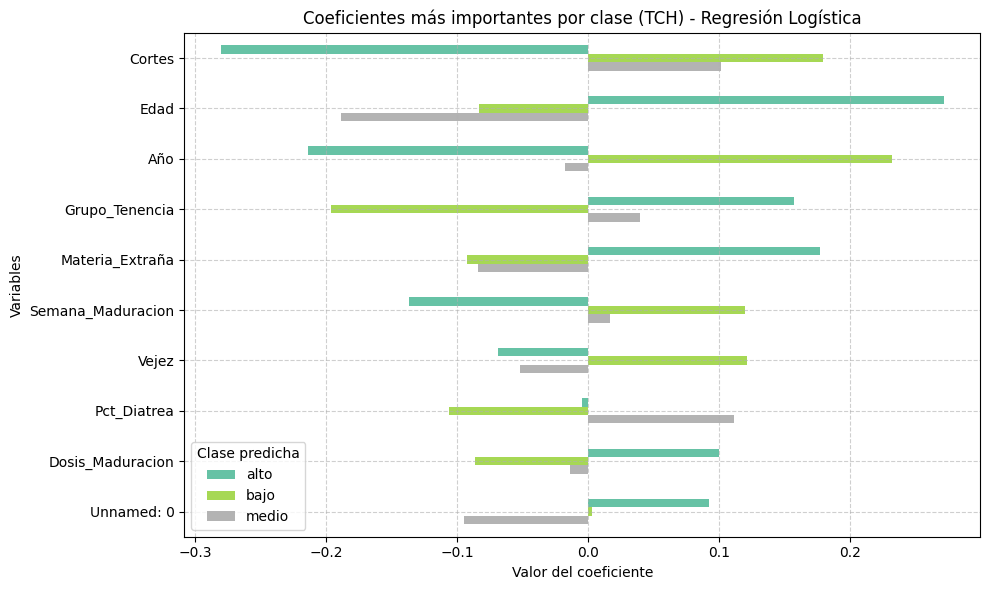

In [ ]:
# Obtener nombres de las variables
feature_names = X_BD.columns
coef = log_model_tch.coef_
classes = log_model_tch.classes_

# Crear DataFrame con los coeficientes
coef_df_tch = pd.DataFrame(coef.T, index=feature_names, columns=classes)

# Seleccionar las 10 variables más importantes (por magnitud máxima entre clases)
coef_df_tch['max_abs'] = coef_df_tch.abs().max(axis=1)
top_features_tch = coef_df_tch.sort_values(by='max_abs', ascending=False).drop(columns='max_abs').head(10)

# Plot
top_features_tch.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title('Coeficientes más importantes por clase (TCH) - Regresión Logística')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Variables')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Clase predicha')
plt.tight_layout()
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.show()


Análisis de coeficientes del modelo de Regresión Logística para TCH


Clase Alto
- Más relevante positivamente: FAZ, Edad, Mes
- Más relevante negativamente: Año, Lluvias, Cortes, Vejez
El modelo sugiere que suertes con mayor edad, ubicadas en ciertas zonas (FAZ), y cosechadas en meses específicos, tienen mayor probabilidad de alcanzar un TCH alto.
Por otro lado, años más recientes, lluvias elevadas y mayor número de cortes reducen esa probabilidad.


Clase Bajo
- Más relevante positivamente: Cortes, Lluvias, Semana_Maduracion, Mes
- Más relevante negativamente: Pct_Diatrea, Edad, Materia_Extraña
Una mayor cantidad de cortes, semanas de maduración tempranas, y lluvias elevadas aumentan la probabilidad de estar en la clase TCH bajo.  
Mientras que una mayor edad del cultivo reduce esa probabilidad.


Clase Medio
- Más relevante positivamente: Pct_Diatrea, Materia_Extraña
- Más relevante negativamente: Cortes, Mes, FAZ, Dosis_Maduracion
En esta clase, los coeficientes tienden a tener menor magnitud, lo cual refleja la dificultad del modelo para predecir correctamente esta categoría.  
Esto está alineado con las métricas obtenidas en el classification report, donde la clase “medio” mostró menor precisión y recall.

Análisis para sacarosa en bd

In [ ]:
feature_names = X_BD.columns
coef = log_model_sac.coef_

for i, clase in enumerate(log_model_sac.classes_):
    print(f"\nImportancia para clase: {clase}")
    for name, c in sorted(zip(feature_names, coef[i]), key=lambda x: abs(x[1]), reverse=True)[:10]:
        print(f"{name}: {c:.4f}")



Importancia para clase: alto
Lluvias: -0.5718
Materia_Extraña: -0.5177
Semana_Maduracion: 0.3905
Mes: 0.3840
Grupo_Tenencia: -0.2898
Pct_Diatrea: -0.1686
Año: 0.1211
Edad: -0.1180
Unnamed: 0: -0.0953
Cortes: -0.0831

Importancia para clase: bajo
Materia_Extraña: 0.4910
Lluvias: 0.4581
Semana_Maduracion: -0.3249
Mes: -0.2800
Grupo_Tenencia: 0.2253
Pct_Diatrea: 0.1796
Edad: 0.1755
Año: -0.1738
Cortes: 0.0537
Dosis_Maduracion: -0.0493

Importancia para clase: medio
Lluvias: 0.1137
Mes: -0.1040
Unnamed: 0: 0.0674
Semana_Maduracion: -0.0655
Grupo_Tenencia: 0.0645
Vejez: -0.0610
Edad: -0.0575
Año: 0.0527
Cortes: 0.0295
Materia_Extraña: 0.0266


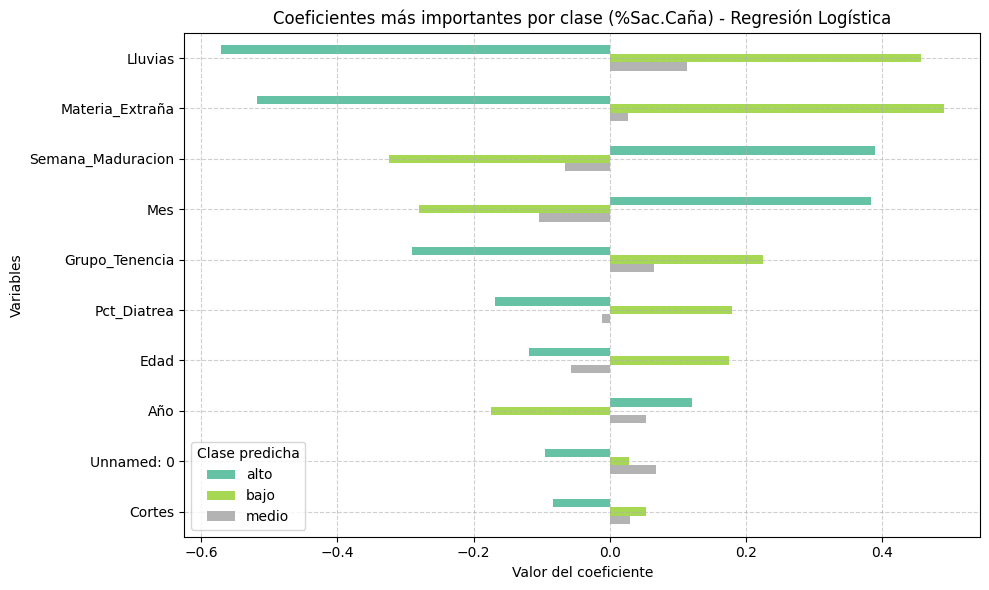

In [ ]:


# Obtener nombres de las variables
feature_names = X_BD.columns
coef = log_model_sac.coef_
classes = log_model_sac.classes_

# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame(coef.T, index=feature_names, columns=classes)

# Seleccionar solo las 10 variables más importantes (por magnitud total)
coef_df['max_abs'] = coef_df.abs().max(axis=1)
top_features = coef_df.sort_values(by='max_abs', ascending=False).drop(columns='max_abs').head(10)

# Plot
top_features.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title('Coeficientes más importantes por clase (%Sac.Caña) - Regresión Logística')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Variables')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Clase predicha')
plt.tight_layout()
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.show()


Según estos coeficientes, podemos decir que:    
- Valores positivos: aumenta la probabilidad de que un registro perteneza a esa clase.  
- Valores negativos: disminuye la probabilidad de pertenecer a esa clase.   
- Valores cercanos a cero: poca influencia.

Así pues:

Para pertenecer a la Clase Alto
Más relevante positivamente: Semana_Maduracion, Mes, Año
Más relevante negativamente: Lluvias, Materia_Extraña, Edad

Lo podriamos interpretar como que según los datos, en ciertos meses y con maduraciones más tardías, hay mayor probabilidad de obtener %Sacarosa alto. Pero lluvias y materia extraña altas lo reducen.

Para la Clase Bajo
Sucede lo contrario, es decir, más lluvias, más materia extraña, menor semana de maduración → más probabilidad de estar en clase “bajo”.

Sin embargo para la Clase Medio
Todos los coeficientes son bajos en magnitud y el modelo no tiene tanta certeza sobre esta clase, lo cual concuerda con las bajas métricas que tenemos.

## 5.4 Evaluacion: Validacion (Cross-validation) & Metricas (Confusion matrix, accuracy, precision, recall, F1-score)

In [ ]:


# Crear el modelo
log_model_tch_cv = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000,
    class_weight='balanced'
)

# Validación cruzada con 5 folds
cv_scores_tch = cross_val_score(
    log_model_tch_cv,
    X_train_tch_scaled,
    y_train_tch,
    cv=5,
    scoring='accuracy'
)

print("Cross-validated accuracy (TCH):", np.mean(cv_scores_tch).round(4))

Cross-validated accuracy (TCH): 0.4549


In [ ]:


# Crear el modelo
log_model_sac_cv = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    max_iter=1000,
    class_weight='balanced'
)

# Validación cruzada con 5 folds
cv_scores_sac = cross_val_score(
    log_model_sac_cv,
    X_train_scaled,
    y_train_sac,
    cv=5,
    scoring='accuracy'
)

# Mostrar el resultado
print("Cross-validated accuracy (%Sac.Caña):", np.mean(cv_scores_sac).round(4))



Cross-validated accuracy (%Sac.Caña): 0.4621


### 5.4 K-Nearest Neighbors (KNN)

KNN para TCH de bd

In [ ]:
knn_tch = KNeighborsClassifier(n_neighbors=5)
knn_tch.fit(X_train_tch_scaled, y_train_tch)

y_tch_knn_pred = knn_tch.predict(X_test_tch_scaled)

In [ ]:
# Evaluación del modelo

print("KNN - Reporte para TCH:")
print(classification_report(y_test_tch, y_tch_knn_pred))
print("Kappa:", cohen_kappa_score(y_test_tch, y_tch_knn_pred))


KNN - Reporte para TCH:
              precision    recall  f1-score   support

        alto       0.45      0.59      0.51       181
        bajo       0.49      0.53      0.51       245
       medio       0.38      0.26      0.31       231

    accuracy                           0.45       657
   macro avg       0.44      0.46      0.44       657
weighted avg       0.44      0.45      0.44       657

Kappa: 0.17599952750872017


In [ ]:
# Validación cruzada

cv_scores_knn_tch = cross_val_score(knn_tch, X_train_tch_scaled, y_train_tch, cv=5, scoring='accuracy')
print("Cross-validated accuracy (KNN - TCH):", np.mean(cv_scores_knn_tch))


Cross-validated accuracy (KNN - TCH): 0.4470588235294118


KNN para Sacarosa de bd

In [ ]:


# Crear el modelo con k=5 (puedes ajustar luego)
knn_sac = KNeighborsClassifier(n_neighbors=5)
knn_sac.fit(X_train_scaled, y_train_tch)

# Predicciones
y_sac_knn_pred = knn_sac.predict(X_test_scaled)


In [ ]:
# Evaluación del modelo

print("KNN - Reporte para %Sac.Caña:")
print(classification_report(y_test_sac, y_sac_knn_pred))


KNN - Reporte para %Sac.Caña:
              precision    recall  f1-score   support

        alto       0.11      0.42      0.18        62
        bajo       0.24      0.38      0.30       170
       medio       0.64      0.24      0.34       425

    accuracy                           0.29       657
   macro avg       0.33      0.35      0.27       657
weighted avg       0.49      0.29      0.32       657



In [ ]:
# Validación cruzada

cv_scores_knn_sac = cross_val_score(knn_sac, X_test_tch_scaled, y_test_sac, cv=5, scoring='accuracy')
print("Cross-validated accuracy (KNN - Sacarosa):", np.mean(cv_scores_knn_sac))


Cross-validated accuracy (KNN - Sacarosa): 0.535796900300717


## 5.5 Resultados y comparación de clasificadores

El modelo de regresión logística aplicado para clasificar los niveles de TCH (toneladas de caña por hectárea) presentó un rendimiento moderado, con una precisión general (accuracy) del 46%. Sin embargo, al analizar los resultados por clase, se evidencia una mejora en la distribución del desempeño comparado con la versión anterior del modelo, aunque aún persisten limitaciones.

La clase “bajo” mostró una mejora notable frente a configuraciones previas: su f1-score aumentó de 0.05 a 0.49, gracias a la redefinición de umbrales mediante curvas ROC que permitieron balancear mejor las clases. En esta nueva configuración, “bajo” pasó de tener solo 18 observaciones a contar con 245, permitiendo que el modelo aprendiera con mayor representatividad.

Por su parte, la clase “alto” obtuvo una precisión de 0.46 y un recall de 0.58, lo que indica un mejor equilibrio entre predicción correcta y cobertura de casos reales. En comparación, la clase “medio” presentó un desempeño ligeramente inferior, con un f1-score de 0.36.

La matriz de confusión revela un modelo más equilibrado, que ya no concentra las predicciones incorrectas únicamente en la clase “alto”, como sucedía inicialmente. Aunque se mantuvo el uso de class_weight='balanced' para mitigar el sesgo, la regresión logística aún muestra dificultades para capturar adecuadamente la complejidad de la distribución multicategórica del TCH.

Estos resultados sugieren que, si bien la redefinición de umbrales mediante curvas ROC aportó valor al balance de clases y permitió una mejor evaluación del modelo por categoría, es recomendable explorar enfoques adicionales. Entre ellos se incluyen algoritmos más robustos como árboles de decisión, random forests o XGBoost, así como ajustes adicionales de parámetros o ingeniería de características que ayuden a mejorar la capacidad del modelo para distinguir entre los tres niveles de rendimiento agrícola.